In [1]:
import pandas as pd

<h1>Question 1</h1>

In [3]:
wind_generation = pd.read_csv("WindGeneration.csv") # importing wind generation csv

In [4]:
wind_generation # visualizing dataframe

,Date,Time,Wind Generation
0,01/01/2014,1,1190.1
1,01/01/2014,2,1186.6
2,01/01/2014,3,1174.3
3,01/01/2014,4,1146.7
4,01/01/2014,5,1156.8
...,...,...,...
8755,31/12/2014,20,996.8
8756,31/12/2014,21,1031.8
8757,31/12/2014,22,1218.0
8758,31/12/2014,23,1312.1


In [5]:
# turning all dates into datetime format
wind_generation["Date"] = pd.to_datetime(wind_generation["Date"], format='mixed', dayfirst = True)

In [6]:
wind_generation

,Date,Time,Wind Generation
0,2014-01-01,1,1190.1
1,2014-01-01,2,1186.6
2,2014-01-01,3,1174.3
3,2014-01-01,4,1146.7
4,2014-01-01,5,1156.8
...,...,...,...
8755,2014-12-31,20,996.8
8756,2014-12-31,21,1031.8
8757,2014-12-31,22,1218.0
8758,2014-12-31,23,1312.1


In [7]:
import matplotlib.pyplot as plt

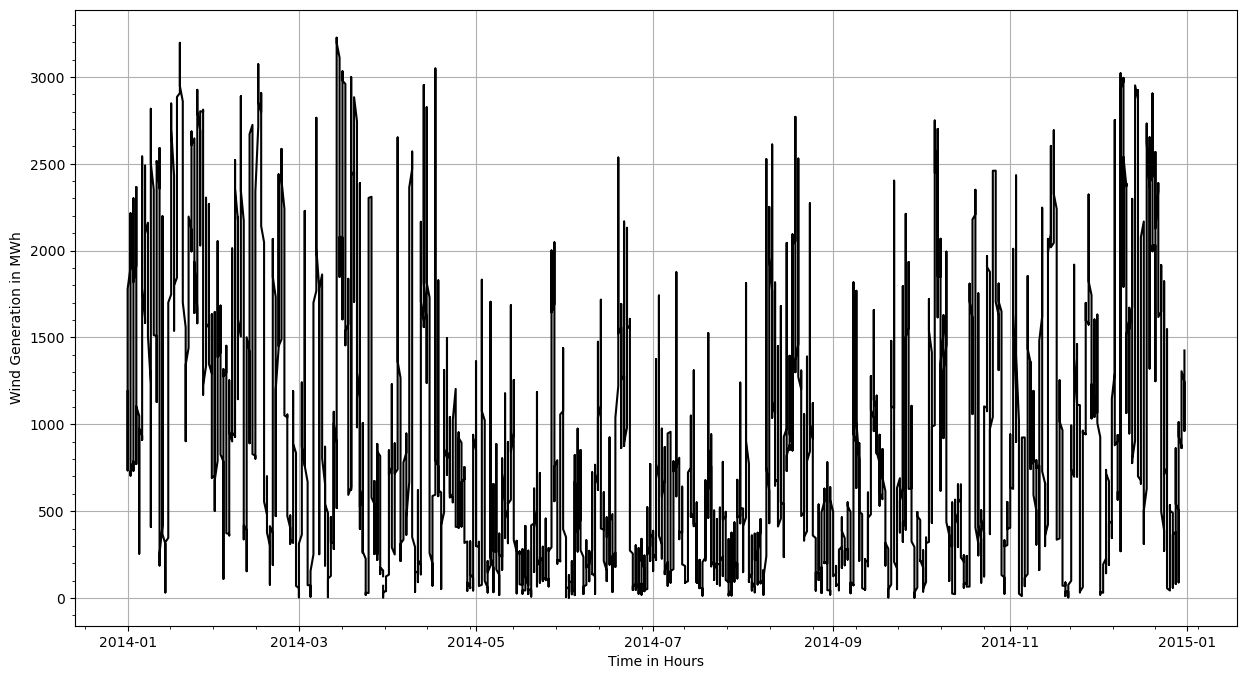

In [8]:
# plotting graph
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(wind_generation["Date"], wind_generation["Wind Generation"],
         zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid()
plt.minorticks_on()

plt.xlabel("Time in Hours")
plt.ylabel("Wind Generation in MWh")

plt.show()

In [9]:
# function to collapse values on different columns depending on the value. will be used for future averages for daily, weekly, monthly, and quarerly
def collapse_df_on_unique(df, on = "Date", how = "unique"):

    return df.groupby(on).mean().reset_index()

In [10]:
daily_wind_generation_mean = collapse_df_on_unique(wind_generation)

In [11]:
import matplotlib.pyplot as plt

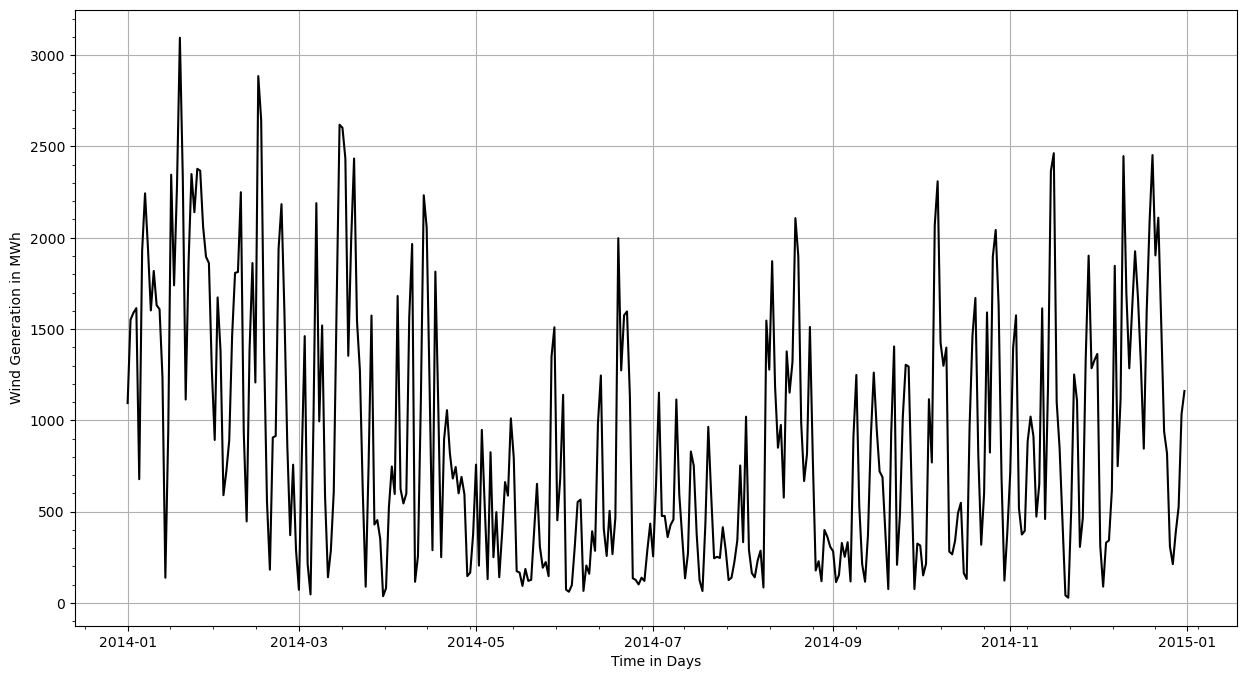

In [12]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(daily_wind_generation_mean["Date"], daily_wind_generation_mean["Wind Generation"],
         zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid()
plt.minorticks_on()

plt.xlabel("Time in Days")
plt.ylabel("Wind Generation in MWh")

plt.show()

In [13]:
wind_generation["Week"] = wind_generation["Date"].dt.isocalendar().week

In [14]:
weekly_wind_generation_mean = collapse_df_on_unique(wind_generation, on = "Week", how = "unique")

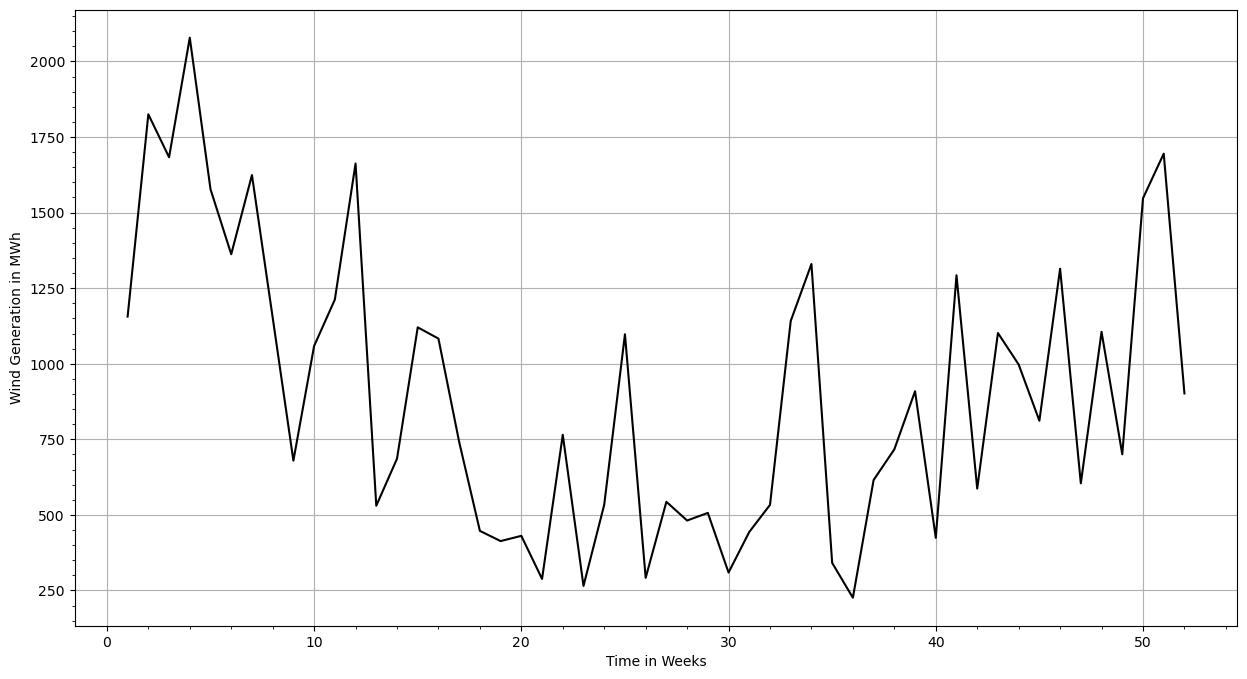

In [15]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(weekly_wind_generation_mean["Week"], weekly_wind_generation_mean["Wind Generation"],
         zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid(True)
plt.minorticks_on()

plt.xlabel("Time in Weeks")
plt.ylabel("Wind Generation in MWh")

plt.show()

In [16]:
# getting month from date
wind_generation["Month"] = wind_generation["Date"].dt.month

In [17]:
monthly_wind_generation_mean = collapse_df_on_unique(wind_generation, on = "Month")

In [18]:
monthly_wind_generation_mean

,Month,Date,Time,Wind Generation,Week
0,1,2014-01-16 00:00:00,12.5,1729.689651,3.0
1,2,2014-02-14 12:00:00,12.5,1282.398810,7.214286
2,3,2014-03-16 00:00:00,12.5,1039.453970,11.419355
3,4,2014-04-15 12:00:00,12.5,867.429167,15.8
4,5,2014-05-16 00:00:00,12.5,504.679839,20.129032
5,6,2014-06-15 12:00:00,12.5,527.385000,24.5
6,7,2014-07-16 00:00:00,12.5,448.696237,28.870968
7,8,2014-08-16 00:00:00,12.5,808.497312,33.258065
8,9,2014-09-15 12:00:00,12.5,589.071250,37.666667
9,10,2014-10-16 00:00:00,12.5,913.053629,42.0


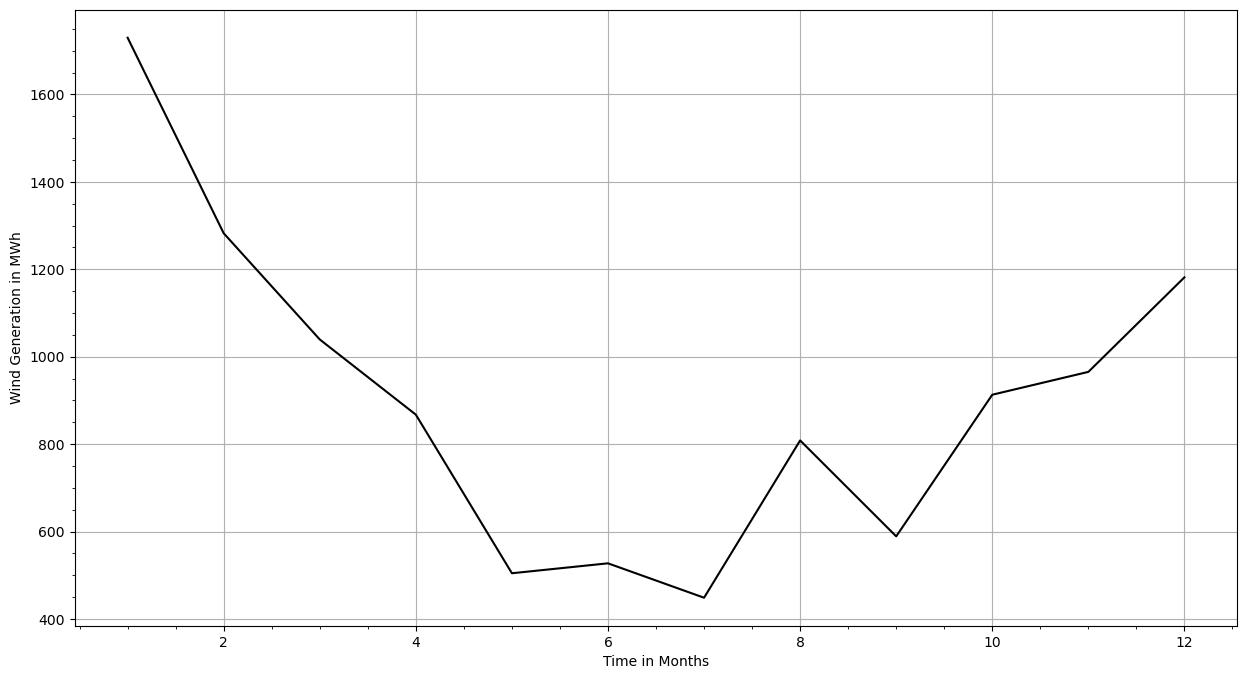

In [19]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(monthly_wind_generation_mean["Month"], monthly_wind_generation_mean["Wind Generation"],
        zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid(True)
plt.minorticks_on()

plt.xlabel("Time in Months")
plt.ylabel("Wind Generation in MWh")

plt.show()

In [20]:
# getting quarter from date
wind_generation["Quarter"] = wind_generation["Date"].dt.quarter

In [21]:
quarterly_wind_generation_mean = collapse_df_on_unique(wind_generation, on = "Quarter")

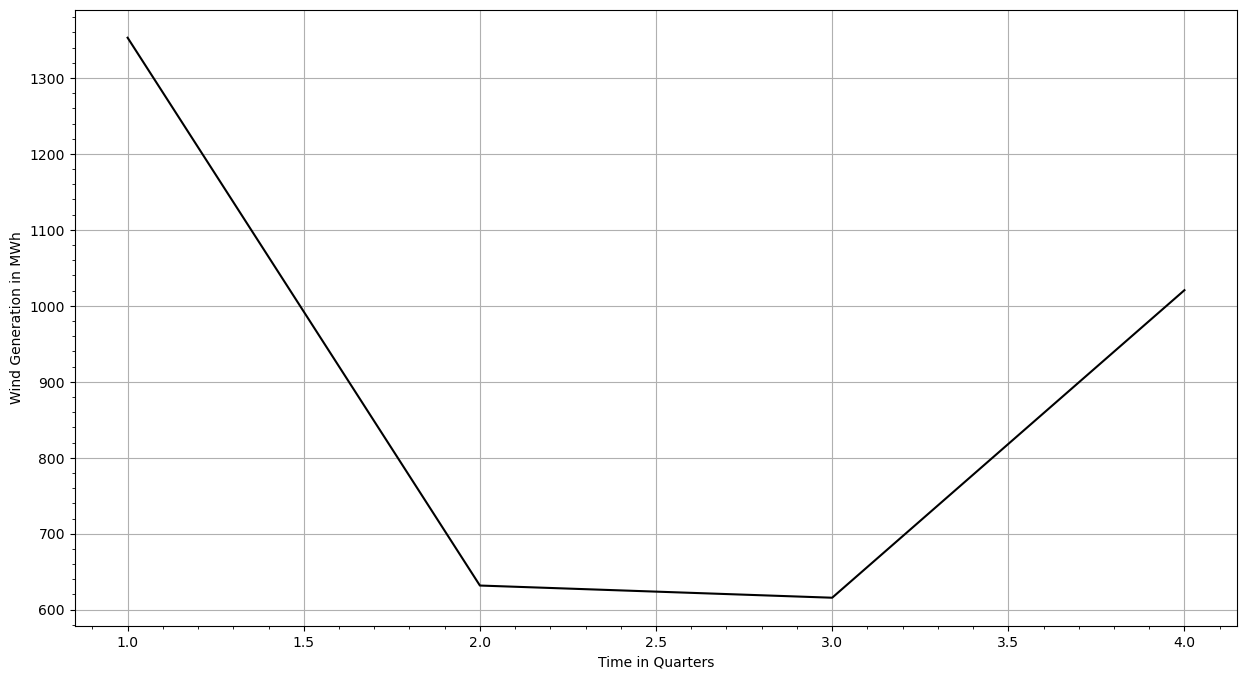

In [22]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(quarterly_wind_generation_mean["Quarter"], quarterly_wind_generation_mean["Wind Generation"],
        zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid(True)
plt.minorticks_on()

plt.xlabel("Time in Quarters")
plt.ylabel("Wind Generation in MWh")

plt.show()

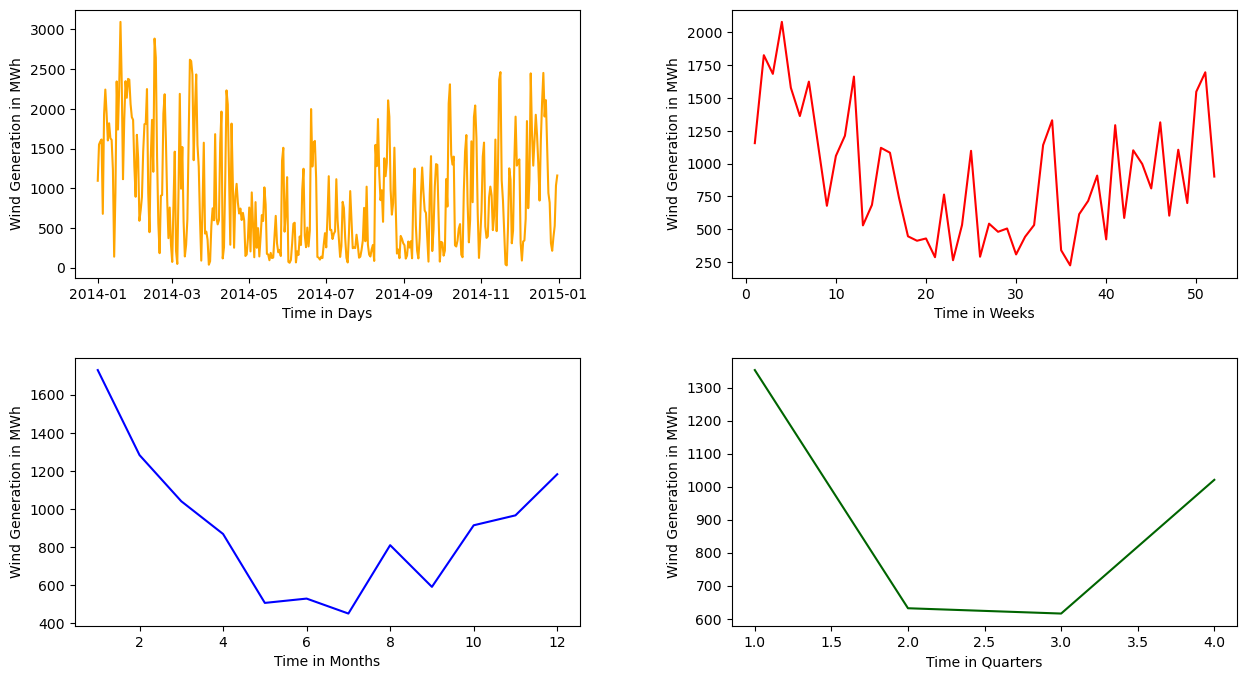

In [23]:
# creating a comparison plot
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 8), squeeze = False)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax[0][0].plot(daily_wind_generation_mean["Date"], daily_wind_generation_mean["Wind Generation"], color = "orange")
ax[0][1].plot(weekly_wind_generation_mean["Week"], weekly_wind_generation_mean["Wind Generation"], color = "red")
ax[1][0].plot(monthly_wind_generation_mean["Month"], monthly_wind_generation_mean["Wind Generation"], color = "blue")
ax[1][1].plot(quarterly_wind_generation_mean["Quarter"], quarterly_wind_generation_mean["Wind Generation"], color = "darkgreen")

ax[0][0].set_xlabel("Time in Days")
ax[0][0].set_ylabel("Wind Generation in MWh")

ax[0][1].set_xlabel("Time in Weeks")
ax[0][1].set_ylabel("Wind Generation in MWh")

ax[1][0].set_xlabel("Time in Months")
ax[1][0].set_ylabel("Wind Generation in MWh")

ax[1][1].set_xlabel("Time in Quarters")
ax[1][1].set_ylabel("Wind Generation in MWh")

plt.show()

In [24]:
wind_generation

,Date,Time,Wind Generation,Week,Month,Quarter
0,2014-01-01,1,1190.1,1,1,1
1,2014-01-01,2,1186.6,1,1,1
2,2014-01-01,3,1174.3,1,1,1
3,2014-01-01,4,1146.7,1,1,1
4,2014-01-01,5,1156.8,1,1,1
...,...,...,...,...,...,...
8755,2014-12-31,20,996.8,1,12,4
8756,2014-12-31,21,1031.8,1,12,4
8757,2014-12-31,22,1218.0,1,12,4
8758,2014-12-31,23,1312.1,1,12,4


<h1>Question 2</h1>

In [26]:
# generation hourly difference as a percent of maximum
wind_generation["% of Max"] = wind_generation["Wind Generation"].diff() / wind_generation["Wind Generation"].max()

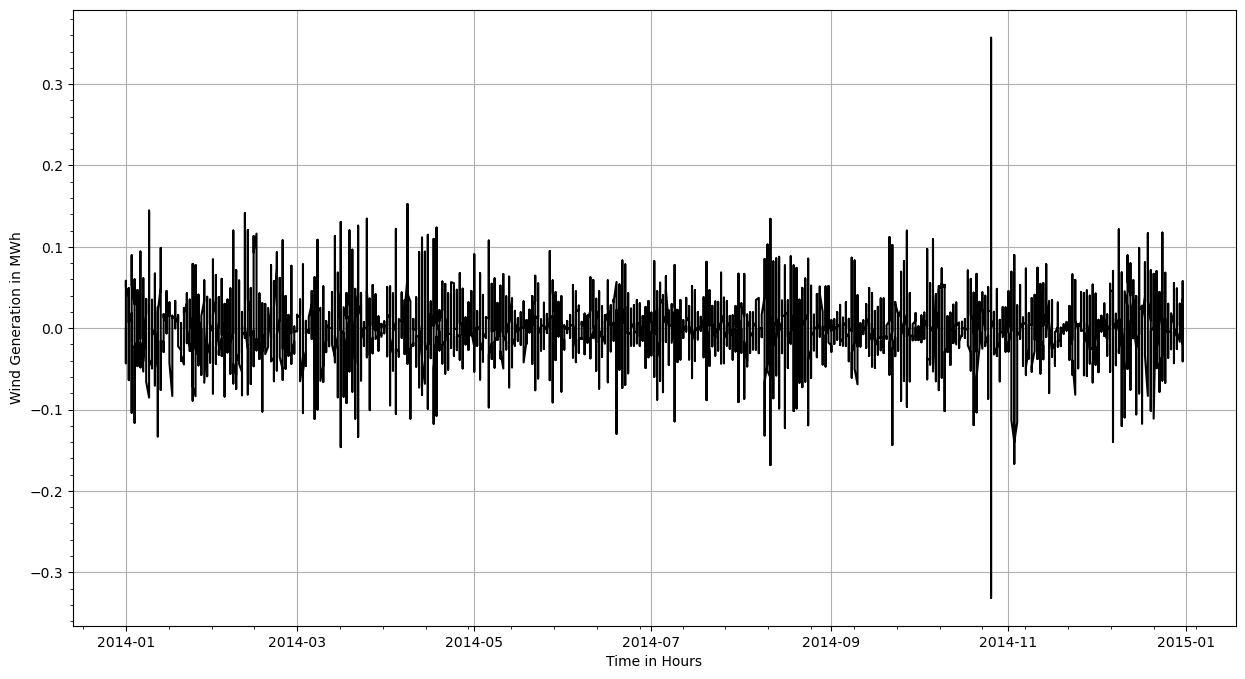

In [27]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(wind_generation["Date"], wind_generation["% of Max"],
        zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid(True)
plt.minorticks_on()

plt.xlabel("Time in Hours")
plt.ylabel("Wind Generation in MWh")

plt.show()

In [28]:
daily_wind_generation_mean["% of Max"] = daily_wind_generation_mean["Wind Generation"].diff() / daily_wind_generation_mean["Wind Generation"].max()

In [29]:
daily_wind_generation_mean

,Date,Time,Wind Generation,% of Max
0,2014-01-01,12.5,1094.641667,NaN
1,2014-01-02,12.5,1550.995833,0.147436
2,2014-01-03,12.5,1588.812500,0.012218
3,2014-01-04,12.5,1614.454167,0.008284
4,2014-01-05,12.5,677.912500,-0.302572
...,...,...,...,...
360,2014-12-27,12.5,212.670833,-0.031278
361,2014-12-28,12.5,386.008333,0.056001
362,2014-12-29,12.5,526.141667,0.045273
363,2014-12-30,12.5,1033.745833,0.163993


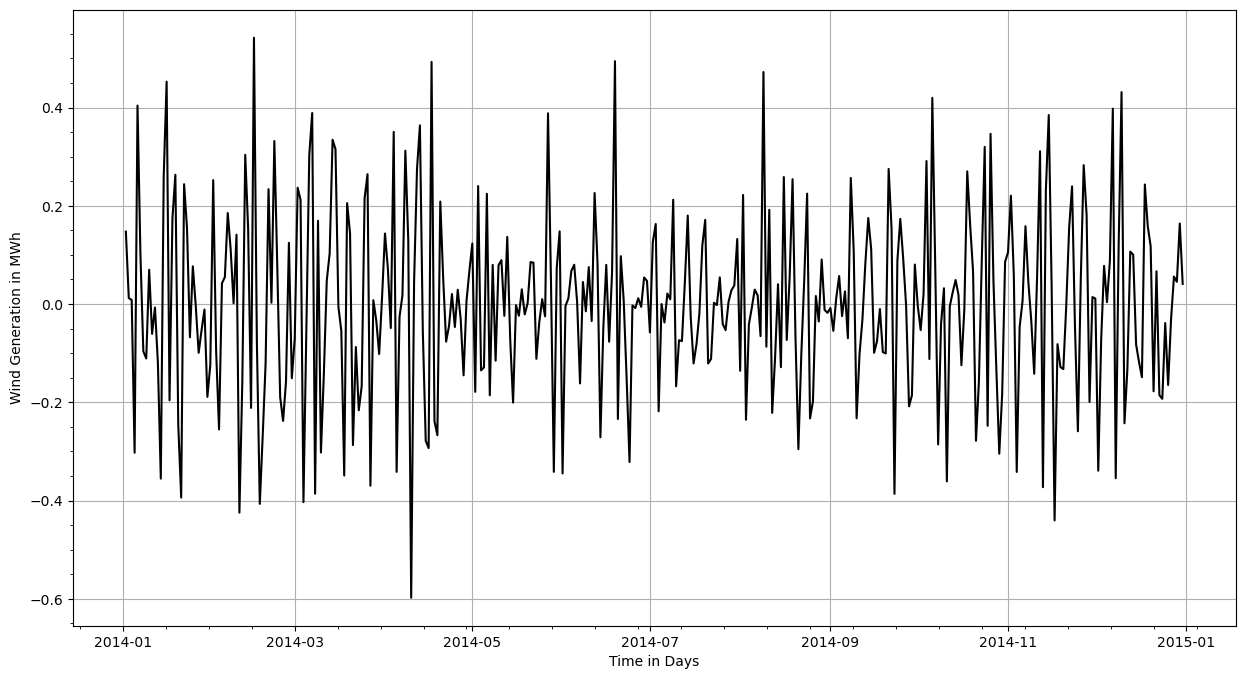

In [30]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(daily_wind_generation_mean["Date"], daily_wind_generation_mean["% of Max"],
        zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid(True)
plt.minorticks_on()

plt.xlabel("Time in Days")
plt.ylabel("Wind Generation in MWh")

plt.show()

In [31]:
weekly_wind_generation_mean["% of Max"] = weekly_wind_generation_mean["Wind Generation"].diff() / weekly_wind_generation_mean["Wind Generation"].max()

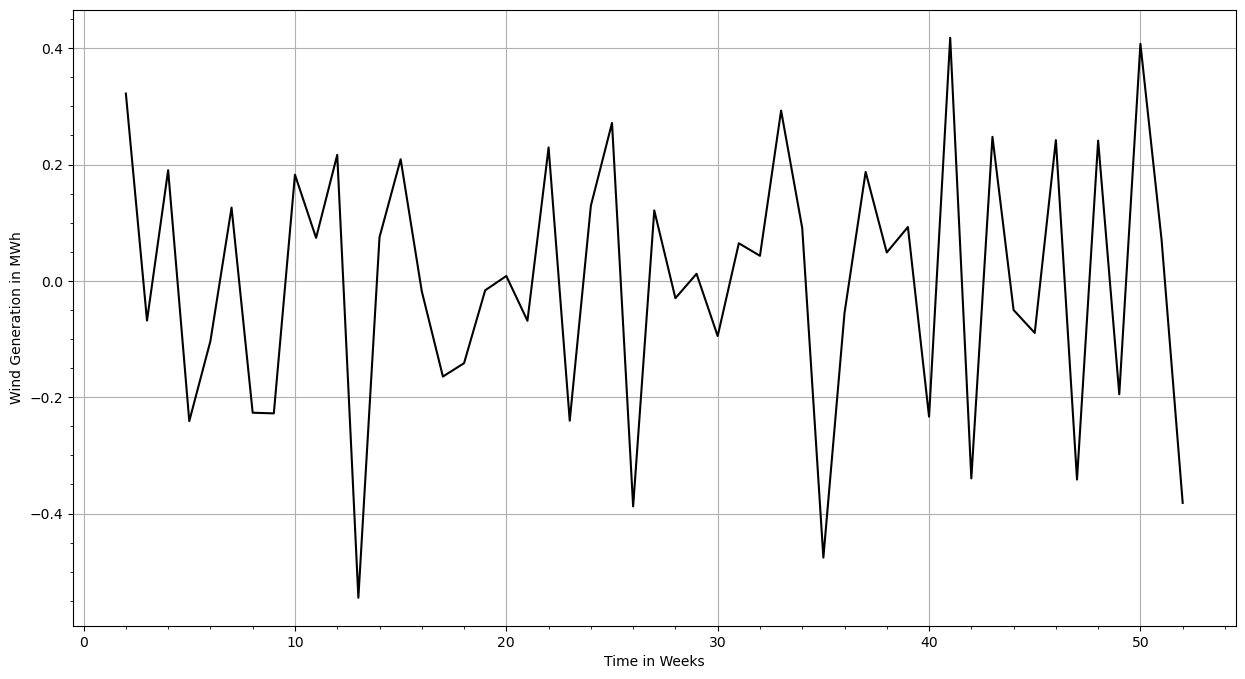

In [32]:
#weekly_percent_wind_generation = collapse_df_on_unique(wind_generation, on = "Week", how = "unique")

plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(weekly_wind_generation_mean["Week"], weekly_wind_generation_mean["% of Max"],
        zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid(True)
plt.minorticks_on()

plt.xlabel("Time in Weeks")
plt.ylabel("Wind Generation in MWh")

plt.show()

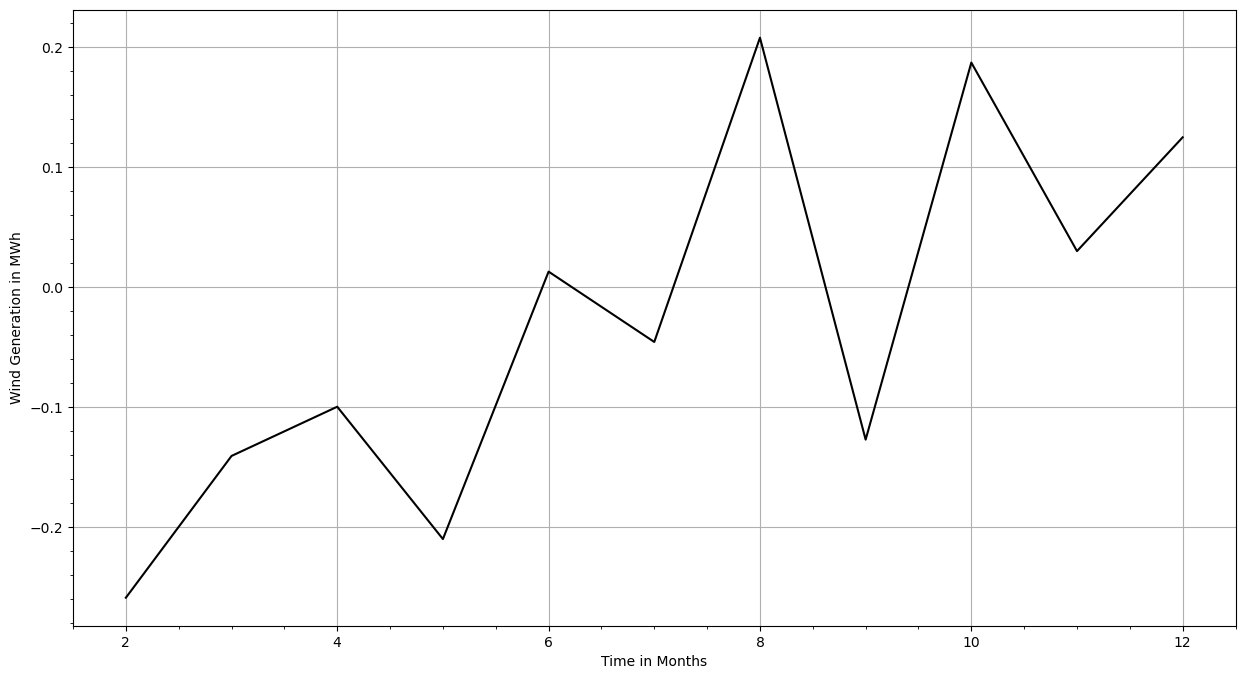

In [33]:
monthly_wind_generation_mean["% of Max"] = monthly_wind_generation_mean["Wind Generation"].diff() / monthly_wind_generation_mean["Wind Generation"].max()

plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(monthly_wind_generation_mean["Month"], monthly_wind_generation_mean["% of Max"],
        zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid(True)
plt.minorticks_on()

plt.xlabel("Time in Months")
plt.ylabel("Wind Generation in MWh")

plt.show()

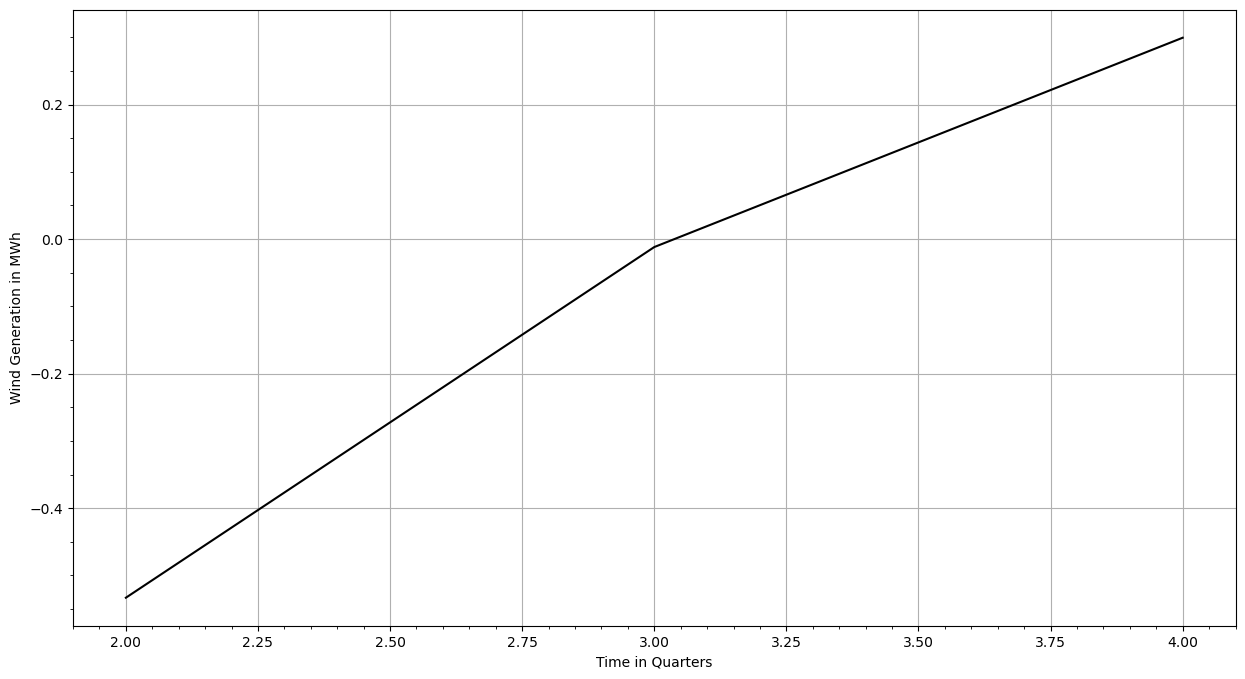

In [34]:
quarterly_wind_generation_mean["% of Max"] = quarterly_wind_generation_mean["Wind Generation"].diff() / quarterly_wind_generation_mean["Wind Generation"].max()

plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(quarterly_wind_generation_mean["Quarter"], quarterly_wind_generation_mean["% of Max"],
        zorder = 3,
        color = "black")

plt.xticks(rotation = 0, zorder = 0)

plt.grid(True)
plt.minorticks_on()

plt.xlabel("Time in Quarters")
plt.ylabel("Wind Generation in MWh")

plt.show()

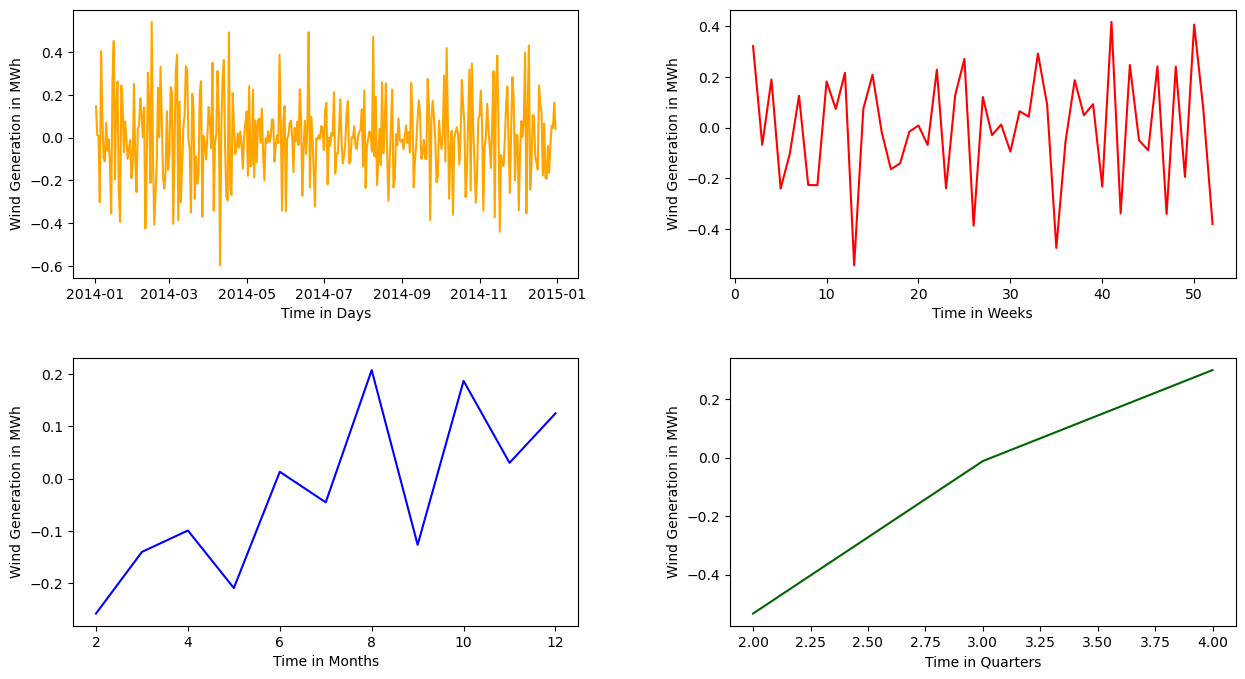

In [35]:
# comparison plot
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 8), squeeze = False)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

ax[0][0].plot(daily_wind_generation_mean["Date"], daily_wind_generation_mean["% of Max"], color = "orange")
ax[0][1].plot(weekly_wind_generation_mean["Week"], weekly_wind_generation_mean["% of Max"], color = "red")
ax[1][0].plot(monthly_wind_generation_mean["Month"], monthly_wind_generation_mean["% of Max"], color = "blue")
ax[1][1].plot(quarterly_wind_generation_mean["Quarter"], quarterly_wind_generation_mean["% of Max"], color = "darkgreen")

ax[0][0].set_xlabel("Time in Days")
ax[0][0].set_ylabel("Wind Generation in MWh")

ax[0][1].set_xlabel("Time in Weeks")
ax[0][1].set_ylabel("Wind Generation in MWh")

ax[1][0].set_xlabel("Time in Months")
ax[1][0].set_ylabel("Wind Generation in MWh")

ax[1][1].set_xlabel("Time in Quarters")
ax[1][1].set_ylabel("Wind Generation in MWh")

plt.show()

<h1>Question 3</h1>

In [37]:
weekly_wind_generation_mean

,Week,Date,Time,Wind Generation,% of Max
0,1,2014-05-18 09:00:00,12.5,1155.926563,NaN
1,2,2014-01-09 00:00:00,12.5,1825.057143,0.321941
2,3,2014-01-16 00:00:00,12.5,1683.083929,-0.068308
3,4,2014-01-23 00:00:00,12.5,2078.429167,0.190213
4,5,2014-01-30 00:00:00,12.5,1577.269643,-0.241124
5,6,2014-02-06 00:00:00,12.5,1362.239286,-0.103458
6,7,2014-02-13 00:00:00,12.5,1624.058333,0.125970
7,8,2014-02-20 00:00:00,12.5,1152.950595,-0.226665
8,9,2014-02-27 00:00:00,12.5,679.428571,-0.227827
9,10,2014-03-06 00:00:00,12.5,1058.663690,0.182462


In [38]:
wind_generation

,Date,Time,Wind Generation,Week,Month,Quarter,% of Max
0,2014-01-01,1,1190.1,1,1,1,NaN
1,2014-01-01,2,1186.6,1,1,1,-0.001085
2,2014-01-01,3,1174.3,1,1,1,-0.003813
3,2014-01-01,4,1146.7,1,1,1,-0.008557
4,2014-01-01,5,1156.8,1,1,1,0.003131
...,...,...,...,...,...,...,...
8755,2014-12-31,20,996.8,1,12,4,-0.009363
8756,2014-12-31,21,1031.8,1,12,4,0.010851
8757,2014-12-31,22,1218.0,1,12,4,0.057729
8758,2014-12-31,23,1312.1,1,12,4,0.029175


In [39]:
# ramp equation
def ramp(df, column = "Wind Generation", d = 1):

    max_x = df[column].max()  # maximum wind power value
    df[f"{d} Hour Ramp"] = 100 * (df[column].shift(-d) - df[column]) / max_x  # compute ramp function
    
    return df.dropna() # remove nan values (typically first row because it has no ramp...)

In [40]:
wind_generation = ramp(wind_generation)

In [41]:
wind_generation

,Date,Time,Wind Generation,Week,Month,Quarter,% of Max,1 Hour Ramp
1,2014-01-01,2,1186.6,1,1,1,-0.001085,-0.381348
2,2014-01-01,3,1174.3,1,1,1,-0.003813,-0.855708
3,2014-01-01,4,1146.7,1,1,1,-0.008557,0.313139
4,2014-01-01,5,1156.8,1,1,1,0.003131,1.020029
5,2014-01-01,6,1189.7,1,1,1,0.010200,-0.443356
...,...,...,...,...,...,...,...,...
8754,2014-12-31,19,1027.0,1,12,4,0.001581,-0.936318
8755,2014-12-31,20,996.8,1,12,4,-0.009363,1.085137
8756,2014-12-31,21,1031.8,1,12,4,0.010851,5.772927
8757,2014-12-31,22,1218.0,1,12,4,0.057729,2.917468


In [42]:
# separating between positive and negative ramps
negative_ramp = wind_generation[wind_generation["1 Hour Ramp"] <= 0]
positive_ramp = wind_generation[wind_generation["1 Hour Ramp"] >= 0]

In [43]:
# absolute value to then sort from smallest to largest (will get reversed because -1 is considered larger than -10)
negative_ramp["1 Hour Ramp"] = negative_ramp["1 Hour Ramp"].abs()

/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/1838730804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_ramp["1 Hour Ramp"] = negative_ramp["1 Hour Ramp"].abs()


In [44]:
# sorting
negative_ramp.sort_values(by = "1 Hour Ramp", inplace = True)
positive_ramp.sort_values(by = "1 Hour Ramp", inplace = True)

/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/4083177428.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_ramp.sort_values(by = "1 Hour Ramp", inplace = True)
/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/4083177428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_ramp.sort_values(by = "1 Hour Ramp", inplace = True)


In [45]:
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
from scipy.stats import norm

In [46]:
# computing ECDF for ramps
ecdf_positive_ramp = ECDF(positive_ramp["1 Hour Ramp"])
ecdf_negative_ramp = ECDF(negative_ramp["1 Hour Ramp"])

In [47]:
# getting mu and sigma for CDF plot later
mu_positive, sigma_positive = np.mean(positive_ramp["1 Hour Ramp"]), np.std(positive_ramp["1 Hour Ramp"])
mu_negative, sigma_negative = np.mean(negative_ramp["1 Hour Ramp"]), np.std(negative_ramp["1 Hour Ramp"])

In [48]:
mu_positive, sigma_positive, mu_negative, sigma_negative

(2.0600289365080293, 2.189726224527354, 2.062002796813093, 2.2283577606865093)

In [49]:
# fitting a cdf for negative and one for positive
cdf_negative = norm.cdf(negative_ramp["1 Hour Ramp"], loc=mu_negative, scale=sigma_negative)
cdf_positive = norm.cdf(positive_ramp["1 Hour Ramp"], loc=mu_positive, scale=sigma_positive)

In [50]:
cdf_positive_ramp = norm.cdf(x = positive_ramp["1 Hour Ramp"])
cdf_negative_ramp = norm.cdf(x = negative_ramp["1 Hour Ramp"])

In [51]:
# removing first value because it is zero (for handling purposes) and it does not affect result
ecdf_negative_ramp = np.delete(ecdf_negative_ramp.y, 0)
ecdf_positive_ramp = np.delete(ecdf_positive_ramp.y, 0)

In [52]:
negative_ramp["ECDF"] = ecdf_negative_ramp
positive_ramp["ECDF"] = ecdf_positive_ramp

negative_ramp["CDF"] = cdf_negative_ramp
positive_ramp["CDF"] = cdf_positive_ramp

/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/3661796337.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_ramp["ECDF"] = ecdf_negative_ramp
/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/3661796337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_ramp["ECDF"] = ecdf_positive_ramp
/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/3661796337.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

In [53]:
negative_ramp["1 - ECDF"] = 1 - ecdf_negative_ramp
positive_ramp["1 - ECDF"] = 1 - ecdf_positive_ramp

negative_ramp["1 - CDF"] = 1 - cdf_negative_ramp
positive_ramp["1 - CDF"] = 1 - cdf_positive_ramp

/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/3930207372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_ramp["1 - ECDF"] = 1 - ecdf_negative_ramp
/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/3930207372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_ramp["1 - ECDF"] = 1 - ecdf_positive_ramp
/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/3930207372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

In [54]:
negative_ramp

,Date,Time,Wind Generation,Week,Month,Quarter,% of Max,1 Hour Ramp,ECDF,CDF,1 - ECDF,1 - CDF
6323,2014-09-21,12,1338.0,38,9,3,0.051187,0.000000,0.000229,0.5,0.999771,0.5
1422,2014-03-01,7,18.0,9,3,1,-0.000961,0.000000,0.000457,0.5,0.999543,0.5
3287,2014-05-17,24,43.3,20,5,2,0.000775,0.000000,0.000686,0.5,0.999314,0.5
5762,2014-08-29,3,590.2,35,8,3,-0.004930,0.000000,0.000914,0.5,0.999086,0.5
2154,2014-03-31,19,97.8,14,3,1,-0.000093,0.000000,0.001143,0.5,0.998857,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...
6353,2014-09-22,18,1492.1,39,9,3,-0.131550,14.348608,0.999086,1.0,0.000914,0.0
1776,2014-03-16,1,2075.7,11,3,1,-0.001240,14.618342,0.999314,1.0,0.000686,0.0
7365,2014-11-03,22,2386.3,45,11,4,-0.014324,16.664600,0.999543,1.0,0.000457,0.0
5347,2014-08-11,20,1854.4,33,8,3,-0.123737,16.825820,0.999771,1.0,0.000229,0.0


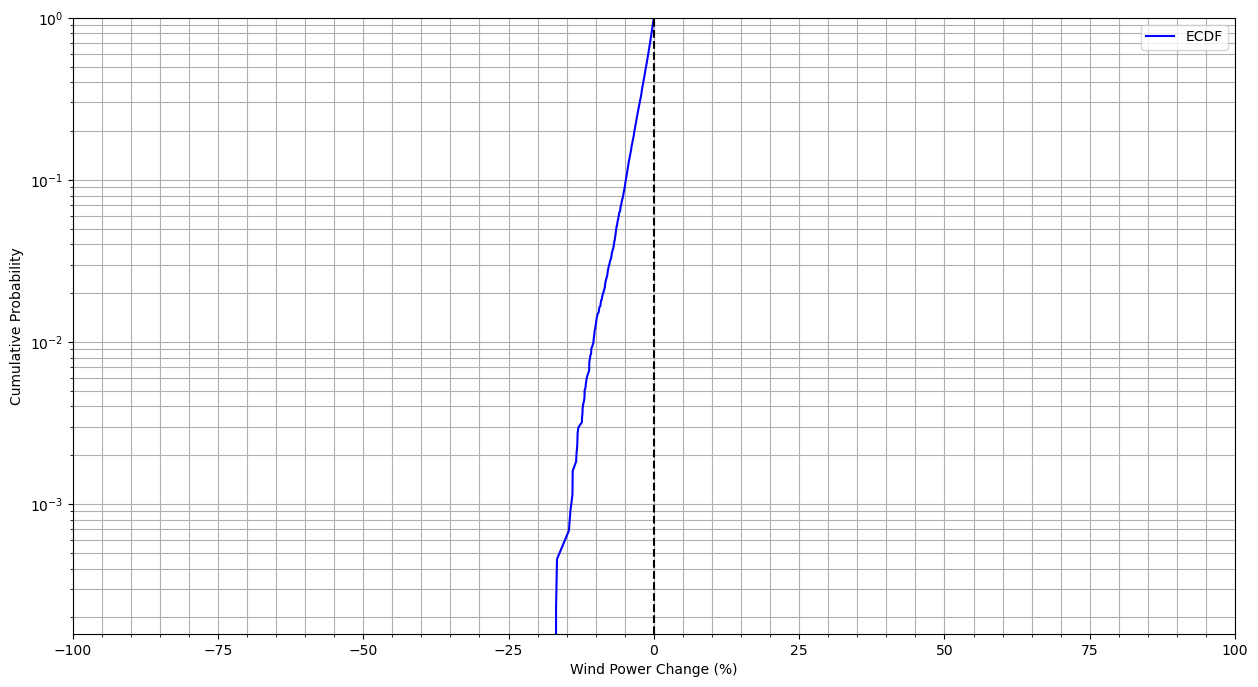

In [55]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.semilogy(-1 * negative_ramp["1 Hour Ramp"], negative_ramp["1 - ECDF"], linestyle = "-", color = "blue", label = "ECDF")
#plt.semilogy(positive_ramp["Ramp"], positive_ramp["1 - ECDF"], linestyle = "-", color = "blue")

#plt.semilogy(-1 * negative_ramp["1 Hour Ramp"], 1 - cdf_negative, color = "red", label = "CDF")
#plt.semilogy(positive_ramp["Ramp"], 1 - cdf_positive, color = "red")

plt.grid(which = "both")
plt.ylim(10 ** -3.8, 1)
plt.xlim(-100, 100)
plt.minorticks_on()

plt.axvline(x = 0, linestyle = "--", color = "black")

plt.legend()
plt.xlabel("Wind Power Change (%)")
plt.ylabel("Cumulative Probability")

plt.show()

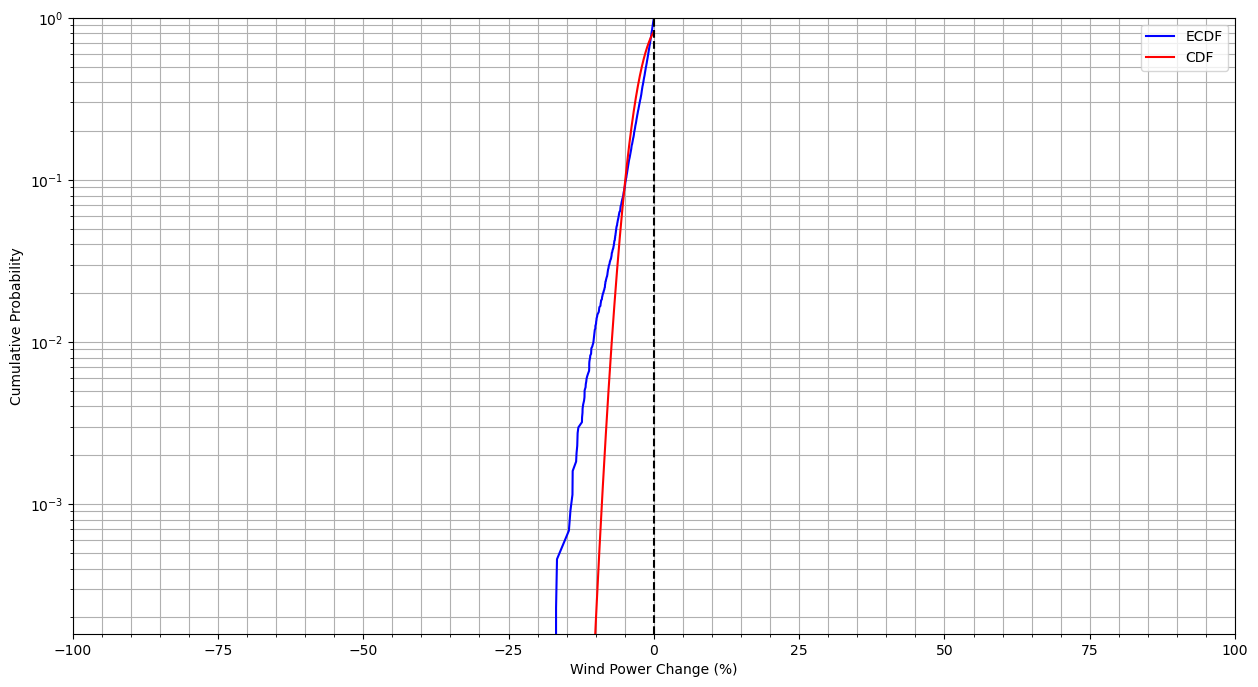

In [56]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.semilogy(-1 * negative_ramp["1 Hour Ramp"], negative_ramp["1 - ECDF"], linestyle = "-", color = "blue", label = "ECDF")
#plt.semilogy(positive_ramp["Ramp"], positive_ramp["1 - ECDF"], linestyle = "-", color = "blue")

plt.semilogy(-1 * negative_ramp["1 Hour Ramp"], 1 - cdf_negative, color = "red", label = "CDF")
#plt.semilogy(positive_ramp["Ramp"], 1 - cdf_positive, color = "red")

plt.grid(which = "both")
plt.ylim(10 ** -3.8, 1)
plt.xlim(-100, 100)
plt.minorticks_on()

plt.axvline(x = 0, linestyle = "--", color = "black")

plt.legend()
plt.xlabel("Wind Power Change (%)")
plt.ylabel("Cumulative Probability")

plt.show()

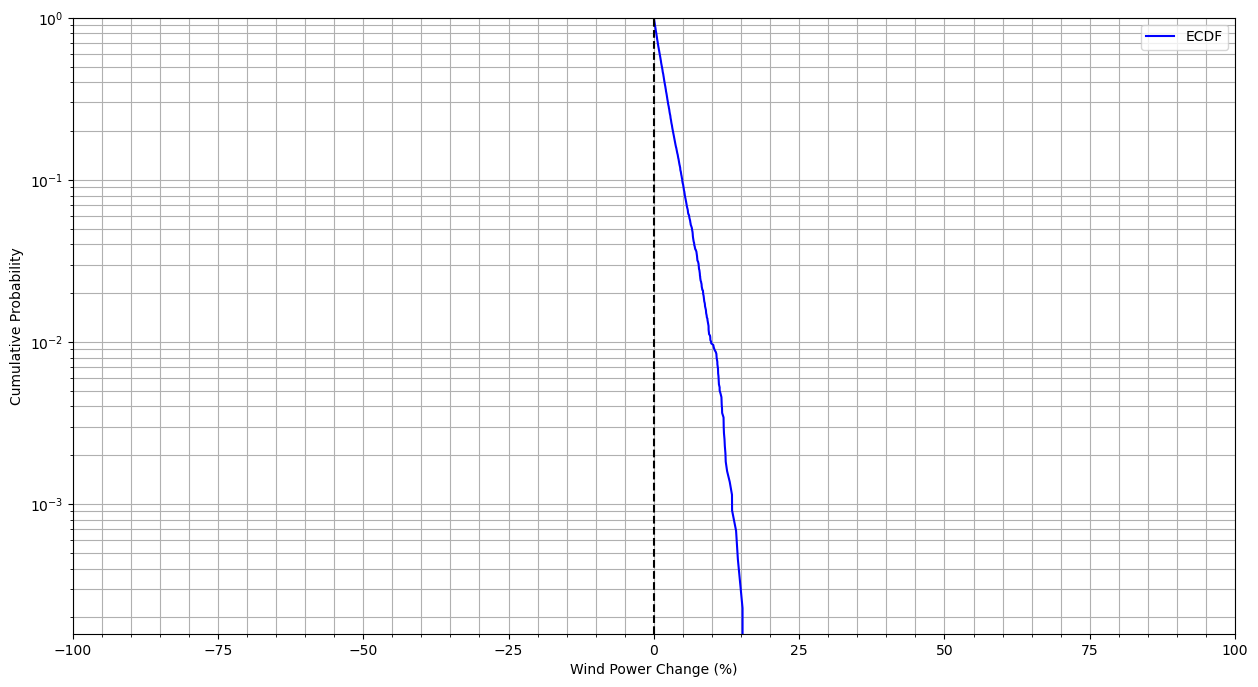

In [57]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

#plt.semilogy(-1 * negative_ramp["Ramp"], negative_ramp["1 - ECDF"], linestyle = "-", color = "blue", label = "ECDF")
plt.semilogy(positive_ramp["1 Hour Ramp"], positive_ramp["1 - ECDF"], linestyle = "-", color = "blue", label = "ECDF")

#plt.semilogy(-1 * negative_ramp["Ramp"], 1 - cdf_negative, color = "red", label = "CDF")
#plt.semilogy(positive_ramp["1 Hour Ramp"], 1 - cdf_positive, color = "red", label = "CDF")

plt.grid(which = "both")
plt.ylim(10 ** -3.8, 1)
plt.xlim(-100, 100)
plt.minorticks_on()

plt.axvline(x = 0, linestyle = "--", color = "black")

plt.legend()
plt.xlabel("Wind Power Change (%)")
plt.ylabel("Cumulative Probability")

plt.show()

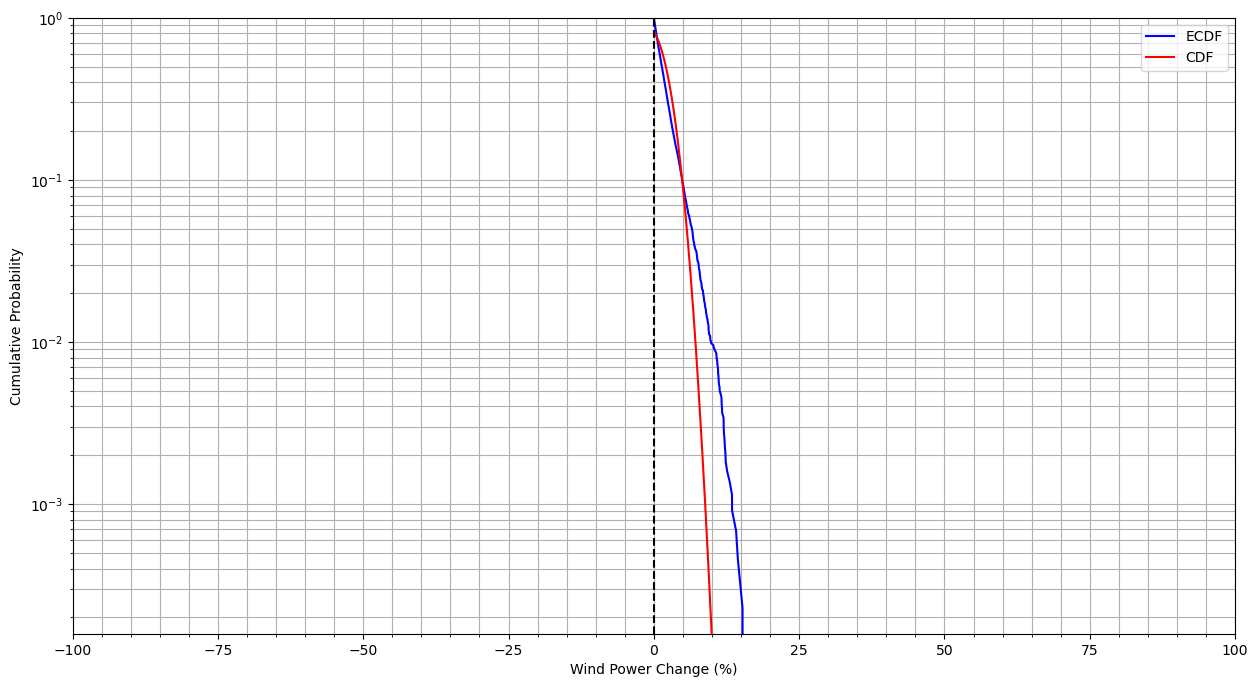

In [58]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

#plt.semilogy(-1 * negative_ramp["Ramp"], negative_ramp["1 - ECDF"], linestyle = "-", color = "blue", label = "ECDF")
plt.semilogy(positive_ramp["1 Hour Ramp"], positive_ramp["1 - ECDF"], linestyle = "-", color = "blue", label = "ECDF")

#plt.semilogy(-1 * negative_ramp["Ramp"], 1 - cdf_negative, color = "red", label = "CDF")
plt.semilogy(positive_ramp["1 Hour Ramp"], 1 - cdf_positive, color = "red", label = "CDF")

plt.grid(which = "both")
plt.ylim(10 ** -3.8, 1)
plt.xlim(-100, 100)
plt.minorticks_on()

plt.axvline(x = 0, linestyle = "--", color = "black")

plt.legend()
plt.xlabel("Wind Power Change (%)")
plt.ylabel("Cumulative Probability")

plt.show()

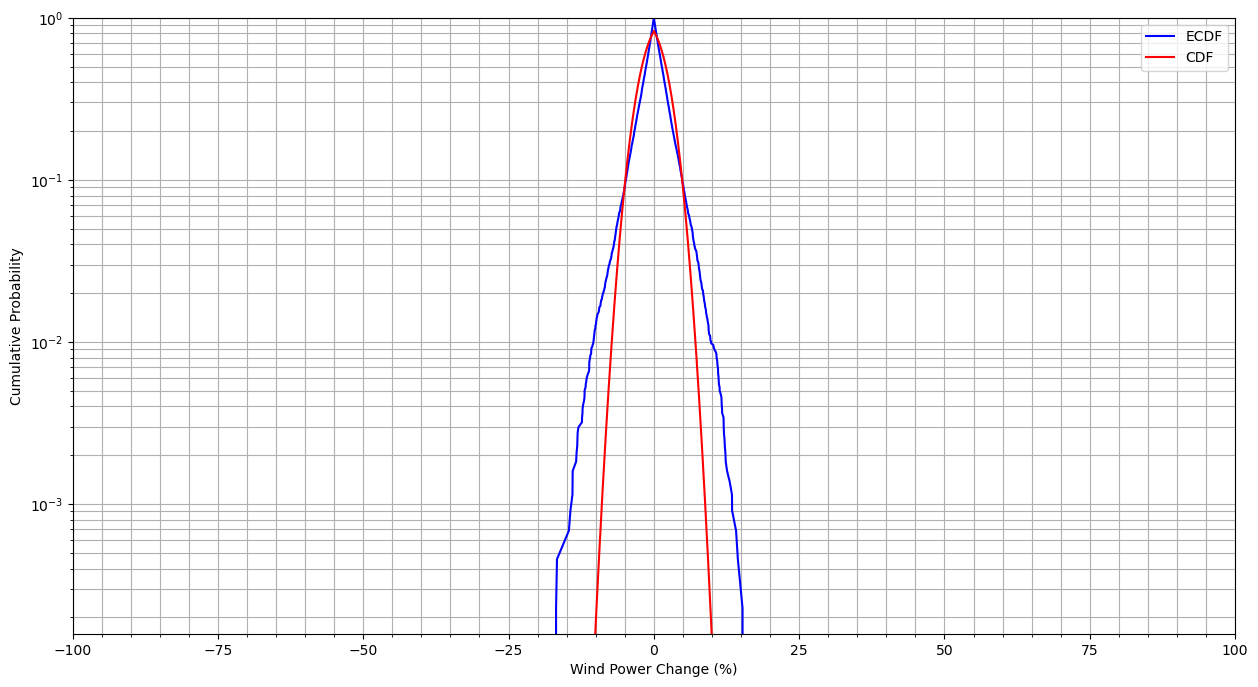

In [59]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.semilogy(-1 * negative_ramp["1 Hour Ramp"], negative_ramp["1 - ECDF"], linestyle = "-", color = "blue", label = "ECDF")
plt.semilogy(positive_ramp["1 Hour Ramp"], positive_ramp["1 - ECDF"], linestyle = "-", color = "blue")

plt.semilogy(-1 * negative_ramp["1 Hour Ramp"], 1 - cdf_negative, color = "red", label = "CDF")
plt.semilogy(positive_ramp["1 Hour Ramp"], 1 - cdf_positive, color = "red")

plt.grid(which = "both")
plt.ylim(10 ** -3.8, 1)
plt.xlim(-100, 100)
plt.minorticks_on()

plt.legend()
plt.xlabel("Wind Power Change (%)")
plt.ylabel("Cumulative Probability")

plt.show()

<h1>Question 4</h1>

In [61]:
for i in range(0, 25):

    wind_generation = ramp(wind_generation, d = i)

/var/folders/mv/w58n0t094j1_0td5w0b14jy00000gn/T/ipykernel_78684/1843371855.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f"{d} Hour Ramp"] = 100 * (df[column].shift(-d) - df[column]) / max_x  # compute ramp function


In [62]:
wind_generation

,Date,Time,Wind Generation,Week,Month,Quarter,% of Max,1 Hour Ramp,0 Hour Ramp,2 Hour Ramp,...,15 Hour Ramp,16 Hour Ramp,17 Hour Ramp,18 Hour Ramp,19 Hour Ramp,20 Hour Ramp,21 Hour Ramp,22 Hour Ramp,23 Hour Ramp,24 Hour Ramp
1,2014-01-01,2,1186.6,1,1,1,-0.001085,-0.381348,0.0,-1.237056,...,-12.801513,-8.039313,-2.210579,1.531593,5.283066,9.143052,13.303776,18.372915,22.239102,25.745644
2,2014-01-01,3,1174.3,1,1,1,-0.003813,-0.855708,0.0,-0.542568,...,-7.657965,-1.829230,1.912941,5.664414,9.524400,13.685124,18.754263,22.620450,26.126992,31.044212
3,2014-01-01,4,1146.7,1,1,1,-0.008557,0.313139,0.0,1.333168,...,-0.973523,2.768649,6.520122,10.380108,14.540832,19.609971,23.476158,26.982700,31.899919,33.115273
4,2014-01-01,5,1156.8,1,1,1,0.003131,1.020029,0.0,0.576673,...,2.455509,6.206982,10.066968,14.227693,19.296831,23.163019,26.669560,31.586780,32.802133,32.488994
5,2014-01-01,6,1189.7,1,1,1,0.010200,-0.443356,0.0,-3.097290,...,5.186954,9.046940,13.207664,18.276803,22.142990,25.649532,30.566751,31.782105,31.468965,30.944999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,2014-12-19,7,1502.1,51,12,4,-0.015440,-5.611707,0.0,-4.787003,...,25.649532,24.372171,27.670987,28.622806,31.772803,28.818131,31.152725,31.524772,30.324921,27.782601
8455,2014-12-19,8,1321.1,51,12,4,-0.056117,0.824704,0.0,4.752899,...,29.983878,33.282694,34.234514,37.384510,34.429838,36.764432,37.136479,35.936628,33.394308,35.056117
8456,2014-12-19,9,1347.7,51,12,4,0.008247,3.928195,0.0,9.524400,...,32.457990,33.409810,36.559807,33.605134,35.939728,36.311775,35.111924,32.569604,34.231413,35.034414
8457,2014-12-19,10,1474.4,51,12,4,0.039282,5.596205,0.0,14.485025,...,29.481615,32.631612,29.676939,32.011533,32.383580,31.183729,28.641409,30.303218,31.106219,29.165375


In [63]:
# splitting between positive and negative ramps
percentiles_positive = pd.DataFrame(columns = [1, 5, 95, 99])

for a in range(0, 25):
    for q in [1, 5, 95, 99]:

        # computing percentiles
        percentiles_positive.loc[f"{a} Hour Ramp", q] = np.percentile(wind_generation[f"{a} Hour Ramp"][wind_generation[f"{a} Hour Ramp"] >= 0], q, axis = 0)

In [64]:
# splitting between positive and negative ramps
percentiles_negative = pd.DataFrame(columns = [1, 5, 95, 99])

for a in range(0, 25):
    for q in [1, 5, 95, 99]:
    
        # computing percentiles
        percentiles_negative.loc[f"{a} Hour Ramp", q] = np.percentile(wind_generation[f"{a} Hour Ramp"][wind_generation[f"{a} Hour Ramp"] <= 0].abs(), q, axis = 0)

In [65]:
percentiles_positive

,1,5,95,99
0 Hour Ramp,0.0,0.0,0.0,0.0
1 Hour Ramp,0.015502,0.088981,6.50462,9.810814
2 Hour Ramp,0.033949,0.15502,12.195387,18.68745
3 Hour Ramp,0.040305,0.217337,17.406213,26.275191
4 Hour Ramp,0.046506,0.269734,21.906585,31.853414
5 Hour Ramp,0.059,0.39995,25.288026,37.089415
6 Hour Ramp,0.086811,0.425219,28.707757,41.432225
7 Hour Ramp,0.072332,0.484591,31.426645,44.492001
8 Hour Ramp,0.112296,0.505674,33.88665,48.023749
9 Hour Ramp,0.145718,0.55187,36.211943,51.110312


In [66]:
percentiles_negative

,1,5,95,99
0 Hour Ramp,0.0,0.0,0.0,0.0
1 Hour Ramp,0.018602,0.093012,6.486792,10.419638
2 Hour Ramp,0.031004,0.167421,12.081912,18.862622
3 Hour Ramp,0.062008,0.243846,17.032771,26.630774
4 Hour Ramp,0.062969,0.306939,21.682117,32.723693
5 Hour Ramp,0.06672,0.337943,25.332052,37.477026
6 Hour Ramp,0.089911,0.395455,29.066937,41.933249
7 Hour Ramp,0.106033,0.471259,32.340175,45.403361
8 Hour Ramp,0.103274,0.514665,35.059838,47.867458
9 Hour Ramp,0.100515,0.502263,36.845973,50.900787


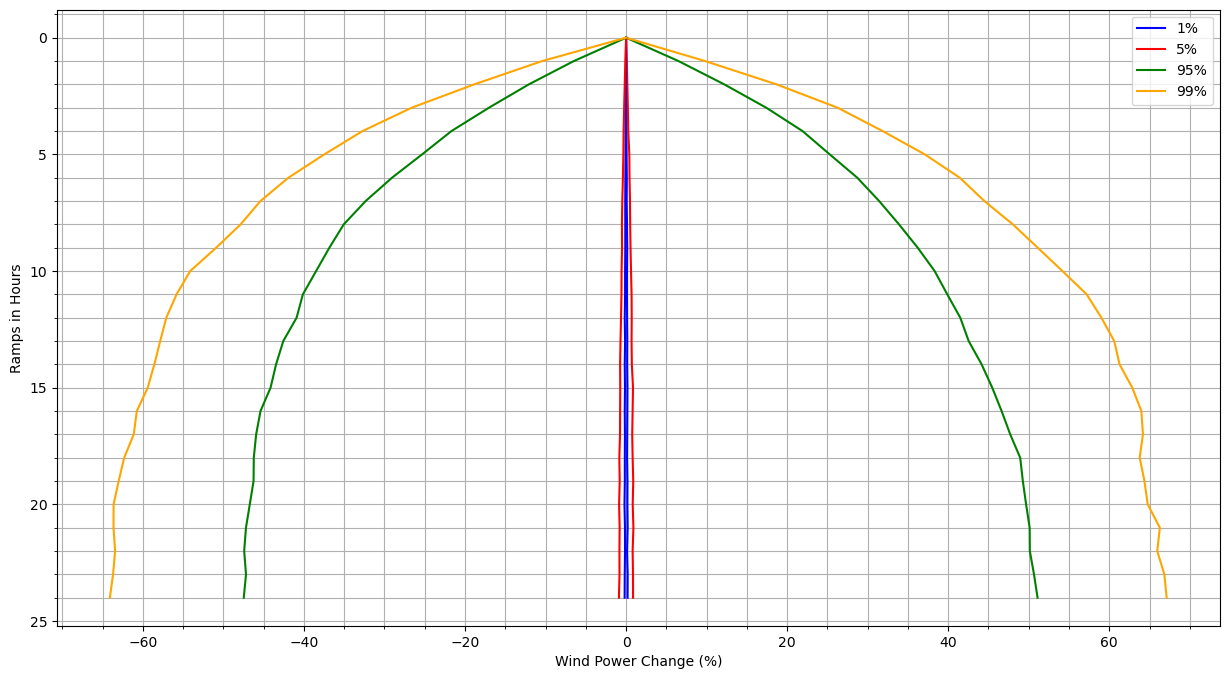

In [67]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(percentiles_positive[1], range(0, 25), color = "blue", label = "1%")
plt.plot(percentiles_positive[5], range(0, 25), color = "red", label = "5%")
plt.plot(percentiles_positive[95], range(0, 25), color = "green", label = "95%")
plt.plot(percentiles_positive[99], range(0, 25), color = "orange", label = "99%")

plt.plot(-1 * percentiles_negative[1], range(0, 25), color = "blue")
plt.plot(-1 * percentiles_negative[5], range(0, 25), color = "red")
plt.plot(-1 * percentiles_negative[95], range(0, 25), color = "green")
plt.plot(-1 * percentiles_negative[99], range(0,25), color = "orange")

plt.xticks(rotation = 0)
plt.grid(which = "both")
plt.gca().invert_yaxis()
plt.minorticks_on()

plt.xlabel("Wind Power Change (%)")
plt.ylabel("Ramps in Hours")
plt.legend()

plt.show()

<h1>Question 5</h1>

In [69]:
from statsmodels.tsa.stattools import acf

In [70]:
# computing autocorrelation manually
lags = range(1, 241)
autocorrelations = [wind_generation["Wind Generation"].autocorr(lag) for lag in lags]

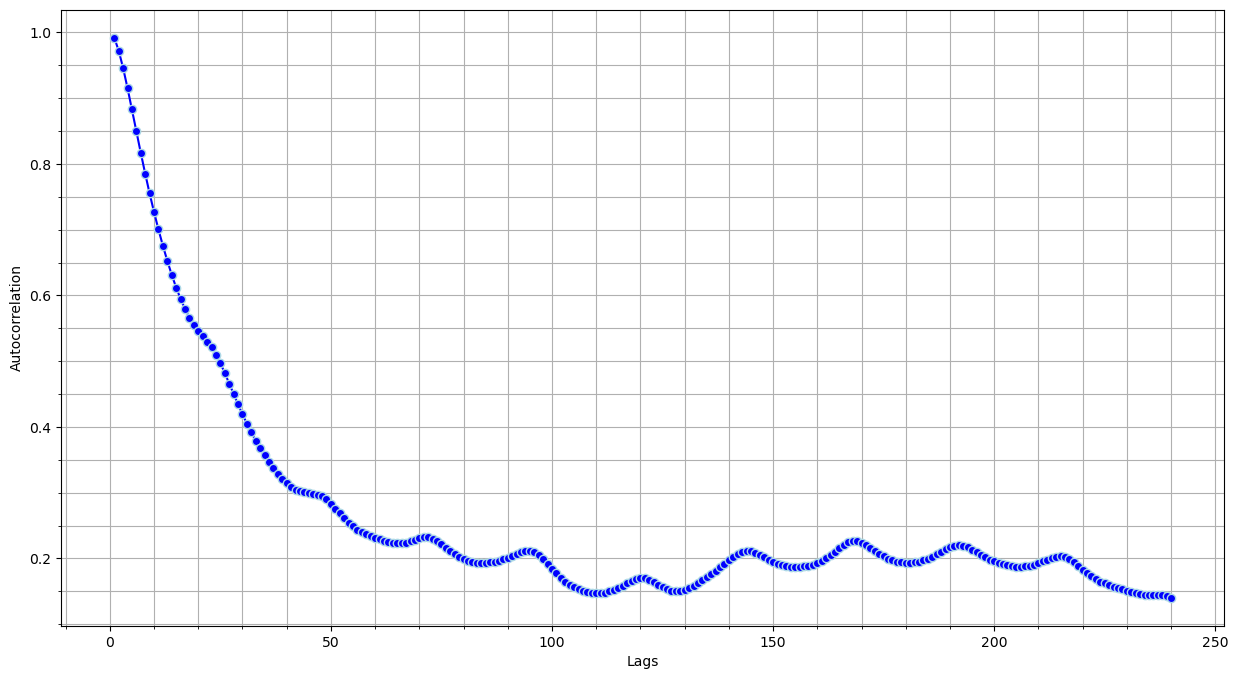

In [71]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(lags, autocorrelations, marker = "o", linestyle = "-", color = "blue", markersize = "6", mec = "lightblue")

plt.grid(which = "both")
plt.minorticks_on()

plt.xlabel("Lags")
plt.ylabel("Autocorrelation")

plt.show()

In [72]:
wind_generation["Hourly Difference"] = wind_generation["Wind Generation"].diff()

In [73]:
wind_generation

,Date,Time,Wind Generation,Week,Month,Quarter,% of Max,1 Hour Ramp,0 Hour Ramp,2 Hour Ramp,...,16 Hour Ramp,17 Hour Ramp,18 Hour Ramp,19 Hour Ramp,20 Hour Ramp,21 Hour Ramp,22 Hour Ramp,23 Hour Ramp,24 Hour Ramp,Hourly Difference
1,2014-01-01,2,1186.6,1,1,1,-0.001085,-0.381348,0.0,-1.237056,...,-8.039313,-2.210579,1.531593,5.283066,9.143052,13.303776,18.372915,22.239102,25.745644,NaN
2,2014-01-01,3,1174.3,1,1,1,-0.003813,-0.855708,0.0,-0.542568,...,-1.829230,1.912941,5.664414,9.524400,13.685124,18.754263,22.620450,26.126992,31.044212,-12.3
3,2014-01-01,4,1146.7,1,1,1,-0.008557,0.313139,0.0,1.333168,...,2.768649,6.520122,10.380108,14.540832,19.609971,23.476158,26.982700,31.899919,33.115273,-27.6
4,2014-01-01,5,1156.8,1,1,1,0.003131,1.020029,0.0,0.576673,...,6.206982,10.066968,14.227693,19.296831,23.163019,26.669560,31.586780,32.802133,32.488994,10.1
5,2014-01-01,6,1189.7,1,1,1,0.010200,-0.443356,0.0,-3.097290,...,9.046940,13.207664,18.276803,22.142990,25.649532,30.566751,31.782105,31.468965,30.944999,32.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,2014-12-19,7,1502.1,51,12,4,-0.015440,-5.611707,0.0,-4.787003,...,24.372171,27.670987,28.622806,31.772803,28.818131,31.152725,31.524772,30.324921,27.782601,-49.8
8455,2014-12-19,8,1321.1,51,12,4,-0.056117,0.824704,0.0,4.752899,...,33.282694,34.234514,37.384510,34.429838,36.764432,37.136479,35.936628,33.394308,35.056117,-181.0
8456,2014-12-19,9,1347.7,51,12,4,0.008247,3.928195,0.0,9.524400,...,33.409810,36.559807,33.605134,35.939728,36.311775,35.111924,32.569604,34.231413,35.034414,26.6
8457,2014-12-19,10,1474.4,51,12,4,0.039282,5.596205,0.0,14.485025,...,32.631612,29.676939,32.011533,32.383580,31.183729,28.641409,30.303218,31.106219,29.165375,126.7


In [74]:
autocorrelations_diff = [wind_generation["Hourly Difference"].autocorr(lag) for lag in lags]

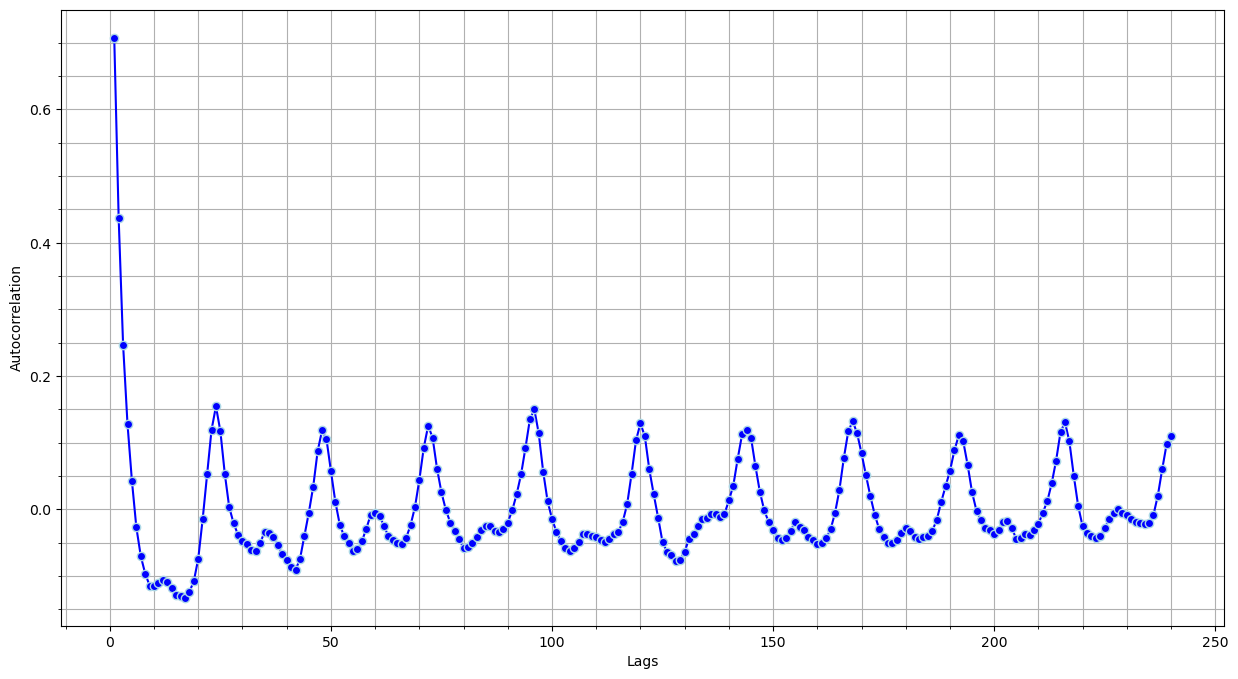

In [75]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.plot(lags, autocorrelations_diff, marker = "o", linestyle = "-", color = "blue", markersize = "6", mec = "lightblue")

plt.grid(which = "both")
plt.minorticks_on()

plt.xlabel("Lags")
plt.ylabel("Autocorrelation")

plt.show()

In [76]:
# confidence interval calculation
confidence_interval = 1.96 / np.sqrt(len(wind_generation))

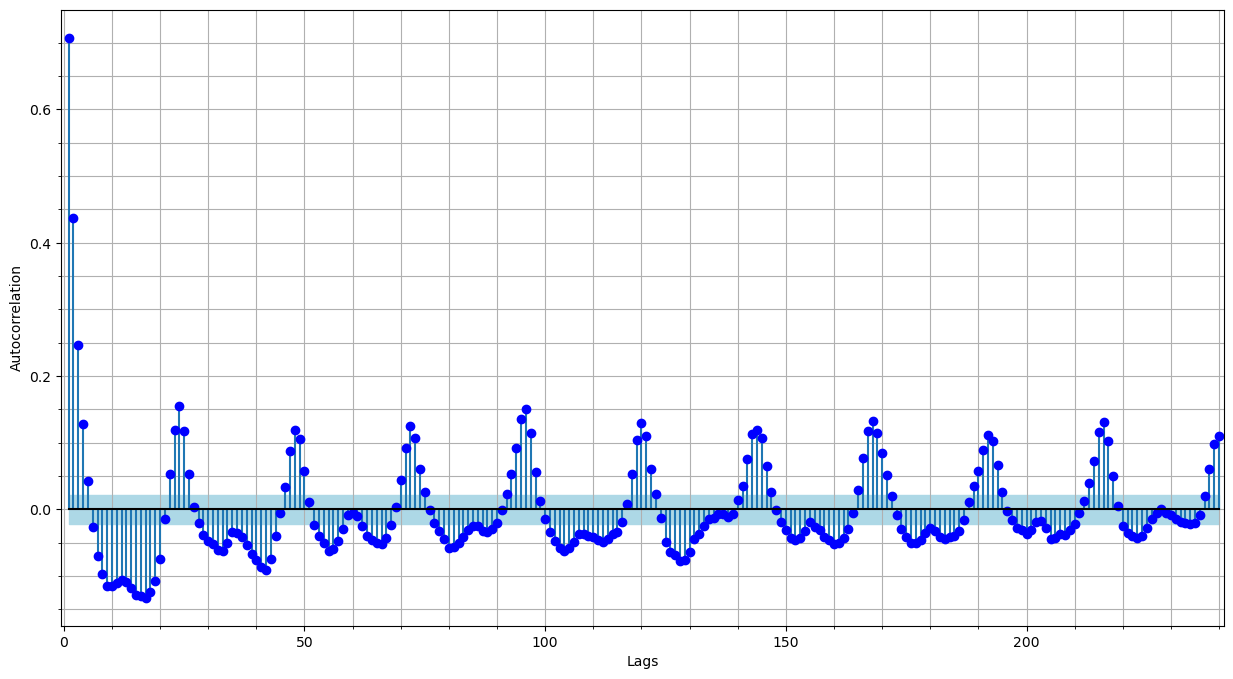

In [77]:
plt.rcParams["font.size"] = 10
plt.figure(figsize = (15, 8))

plt.stem(lags, autocorrelations_diff,
         #linefmt = "b-",
         markerfmt = "bo",
         basefmt = "k-",
        )

plt.grid(which = "both")
plt.minorticks_on()
plt.xlim(-0.5, 241)

plt.fill_between(x = lags, y1 = confidence_interval, y2 = -confidence_interval, color = "lightblue")

plt.xlabel("Lags")
plt.ylabel("Autocorrelation")

plt.show()

In [78]:
from statsmodels.graphics.tsaplots import plot_acf

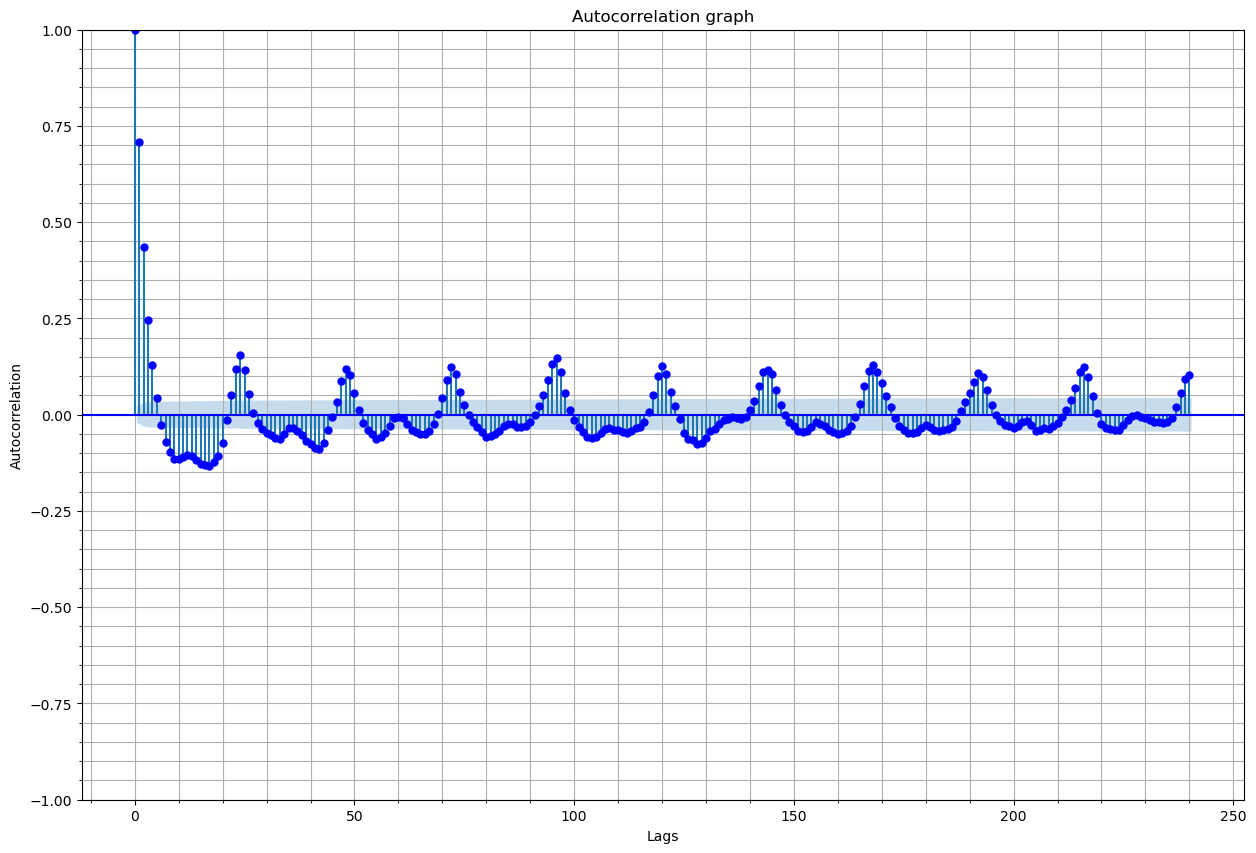

In [79]:
# verifying previous plot with plot_acf for consistency
fig, ax = plt.subplots(figsize = (15, 10))

plot_acf(wind_generation["Hourly Difference"].dropna(), lags = 240, ax = ax, fft = True, color = "blue", alpha = 0.05)

ax.grid(which = "both")
ax.minorticks_on()

plt.xlabel("Lags")
plt.ylabel("Autocorrelation")

plt.title("Autocorrelation graph")

plt.show()

<h1>Question 6</h1>

In [81]:
from arch.unitroot import VarianceRatio

In [82]:
# variance test testing to check how to access pvalue and statistic
vr_test = VarianceRatio(wind_generation["Hourly Difference"].dropna(), lags = 5)
vr_test.stat

-2.5974112718590474

In [83]:
# finding pvalue and statistic for each lag value between 2 and 240
lags_to_test = range(2, 241)
pvalues = pd.DataFrame(columns = ["pvalue", "statistic"])

for i in lags_to_test:

    pvalues.loc[f"{i} Lags", "pvalue"] = VarianceRatio(wind_generation["Hourly Difference"].dropna(), lags = i).pvalue
    pvalues.loc[f"{i} Lags", "statistic"] = VarianceRatio(wind_generation["Hourly Difference"].dropna(), lags = i).stat

In [84]:
pvalues

,pvalue,statistic
2 Lags,0.644529,-0.461376
3 Lags,0.188448,-1.315183
4 Lags,0.038866,-2.065602
5 Lags,0.009393,-2.597411
6 Lags,0.002995,-2.968276
...,...,...
236 Lags,0.000138,-3.812606
237 Lags,0.000139,-3.809867
238 Lags,0.00014,-3.807726
239 Lags,0.000142,-3.805437


In [85]:
# minimum pvalue for 24 lags
pvalues[pvalues["pvalue"] <= 0.05].idxmin()

pvalue       24 Lags
statistic    24 Lags
dtype: object

In [86]:
pvalues[pvalues["pvalue"]<= 0.05]

,pvalue,statistic
4 Lags,0.038866,-2.065602
5 Lags,0.009393,-2.597411
6 Lags,0.002995,-2.968276
7 Lags,0.000974,-3.29806
8 Lags,0.000352,-3.573358
...,...,...
236 Lags,0.000138,-3.812606
237 Lags,0.000139,-3.809867
238 Lags,0.00014,-3.807726
239 Lags,0.000142,-3.805437


In [87]:
pvalues[pvalues["pvalue"] > 0.05]

,pvalue,statistic
2 Lags,0.644529,-0.461376
3 Lags,0.188448,-1.315183


In [88]:
pvalues[pvalues["statistic"]< 1]

,pvalue,statistic
2 Lags,0.644529,-0.461376
3 Lags,0.188448,-1.315183
4 Lags,0.038866,-2.065602
5 Lags,0.009393,-2.597411
6 Lags,0.002995,-2.968276
...,...,...
236 Lags,0.000138,-3.812606
237 Lags,0.000139,-3.809867
238 Lags,0.00014,-3.807726
239 Lags,0.000142,-3.805437


In [89]:
window_size = range(1, 25)
from sklearn.metrics import mean_absolute_error
mae_list = []

In [90]:
for n in window_size:

    wind_generation[f"SMA {n}"] = wind_generation["Wind Generation"].rolling(window = n).mean()
    mae = mean_absolute_error(wind_generation["Wind Generation"][n:], wind_generation[f"SMA {n}"][n:])


    mae_list.append(mae)

In [91]:
mae_list

[0.0,
 33.10406956110256,
 62.40847531156334,
 88.79269613063543,
 112.8009798816568,
 134.69530910955933,
 154.86378348214285,
 173.55415976086184,
 190.7805627910648,
 206.61613735938428,
 221.0608770078808,
 234.3977022385408,
 246.95180598837317,
 258.60265963748367,
 269.3551951026856,
 279.32300776158314,
 288.62434016981996,
 297.3335506301608,
 305.3082004442116,
 312.5567931238886,
 319.19202999198257,
 325.2334395179112,
 330.818859830047,
 336.1480048827739]

In [92]:
optimal_n = window_size[np.argmin(mae_list)]
optimal_n

1

In [93]:
persistence_forecast = wind_generation["Wind Generation"].shift(1) 
persistence_forecast

1          NaN
2       1186.6
3       1174.3
4       1146.7
5       1156.8
         ...  
8454    1551.9
8455    1502.1
8456    1321.1
8457    1347.7
8458    1474.4
Name: Wind Generation, Length: 8455, dtype: float64

In [94]:
mae_persistence = mean_absolute_error(wind_generation["Wind Generation"][1:], persistence_forecast[1:])
mae_persistence

66.20176247929975

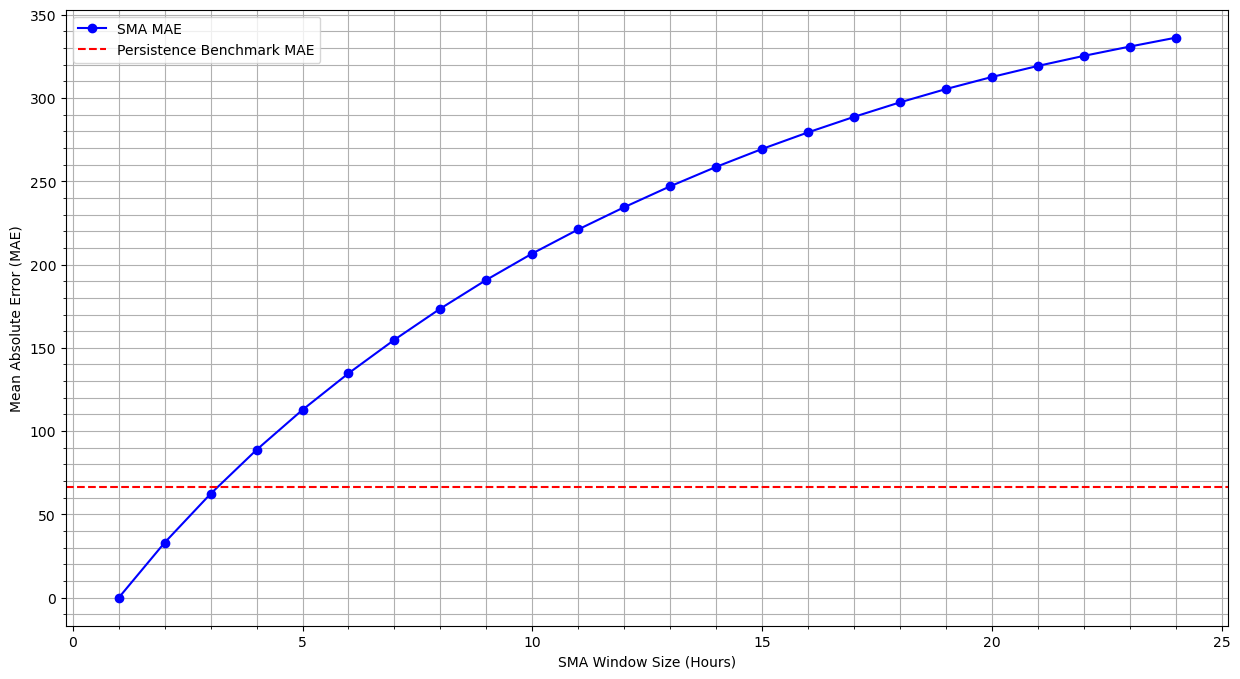

In [95]:
plt.figure(figsize=(15, 8))
plt.plot(window_size, mae_list, marker="o", linestyle="-", color="blue", label="SMA MAE")

plt.axhline(mae_persistence, color="red", linestyle="--", label="Persistence Benchmark MAE")
plt.minorticks_on()

plt.xlabel("SMA Window Size (Hours)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.grid(which = "both")

plt.show()

In [96]:
mae_values = []

for n in window_size:
    wind_generation[f"Persistence_{n}"] = wind_generation["Wind Generation"].shift(n)  # Forecast using X(t-n)
    
    # Compute MAE, handling NaN values caused by shifting
    mae = mean_absolute_error(
        wind_generation["Wind Generation"][n:],  # Actual values
        wind_generation[f"Persistence_{n}"][n:]  # Predicted values
    )
    mae_values.append(mae)

In [97]:
mae_values

[66.20176247929975,
 123.78977877676564,
 174.3395646000947,
 219.10097029937285,
 259.1552781065089,
 295.2611906734525,
 327.3739109848485,
 356.29046998934535,
 382.29970400189444,
 405.5525991711072,
 426.21506395073425,
 444.8496979746536,
 461.3752902155888,
 476.71143229475183,
 490.9591232227488,
 503.6257139471502,
 514.4617444892154,
 523.7391608391608,
 531.3785087719298,
 537.6695554238293,
 543.117144889732,
 548.3390726906202,
 554.3766959203036,
 561.5321551417388]

In [98]:
max_wind_gen = wind_generation["Wind Generation"].max()
mae_percent = [(mae / max_wind_gen) * 100 for mae in mae_values]

In [99]:
max_mae_percent = max(mae_percent)
optimal_n = window_size[np.argmax(mae_percent)]

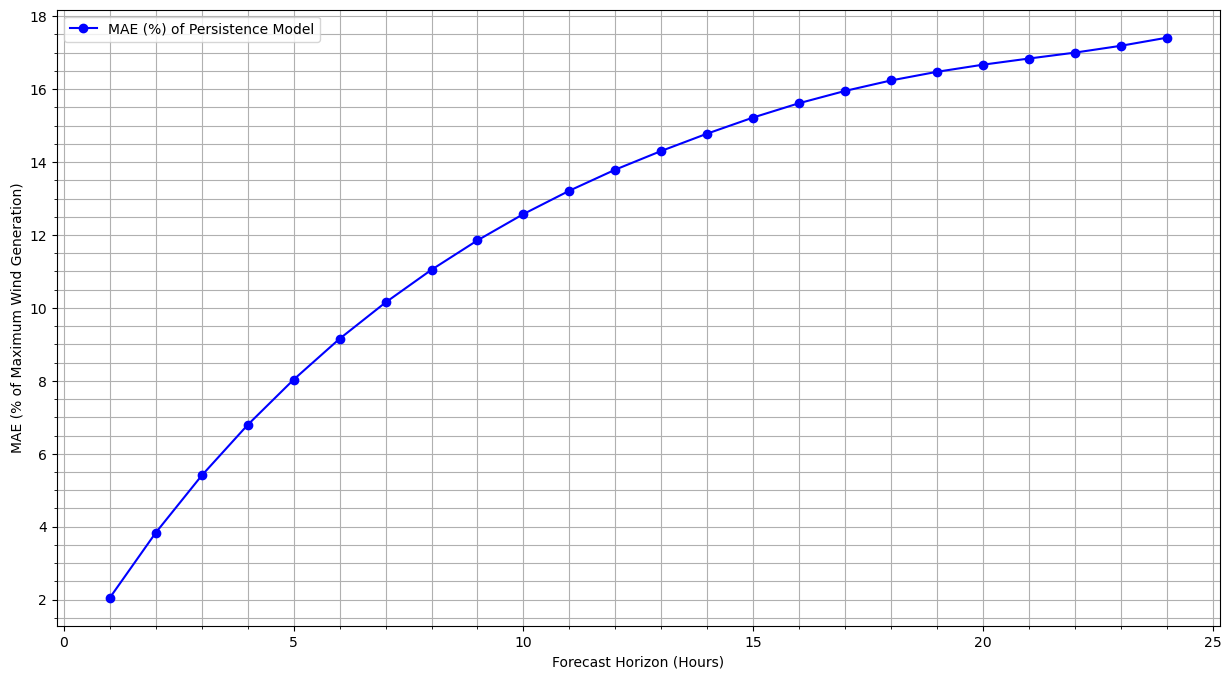

In [100]:
plt.figure(figsize=(15, 8))
plt.plot(window_size, mae_percent, marker="o", linestyle="-", color="blue", label="MAE (%) of Persistence Model")

plt.minorticks_on()

plt.xlabel("Forecast Horizon (Hours)")
plt.ylabel("MAE (% of Maximum Wind Generation)")
plt.legend()
plt.grid(which = "both")

plt.show()

In [101]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [102]:
p_values = range(1, 5)
q_values = range(1, 5)

d = 1

results = []

In [103]:
for p, q in itertools.product(p_values, q_values):
    try:
        # fit ARIMA model
        model = ARIMA(wind_generation["Wind Generation"], order=(p, d, q))
        fitted_model = model.fit()

        # store AIC and BIC
        results.append((p, q, fitted_model.aic, fitted_model.bic))

    except Exception as e:
        # handle cases where model fails
        print(f"ARIMA({p},{d},{q}) failed: {e}")

results_df = pd.DataFrame(results, columns=["p", "q", "AIC", "BIC"])

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  

In [104]:
optimal_model = results_df.loc[results_df["AIC"].idxmin()]
optimal_p, optimal_q = optimal_model["p"], optimal_model["q"]
print(f"Optimal ARIMA model: ARIMA({optimal_p},1,{optimal_q}) with AIC={optimal_model['AIC']:.2f}, BIC={optimal_model['BIC']:.2f}")

Optimal ARIMA model: ARIMA(3.0,1,1.0) with AIC=95208.66, BIC=95243.87


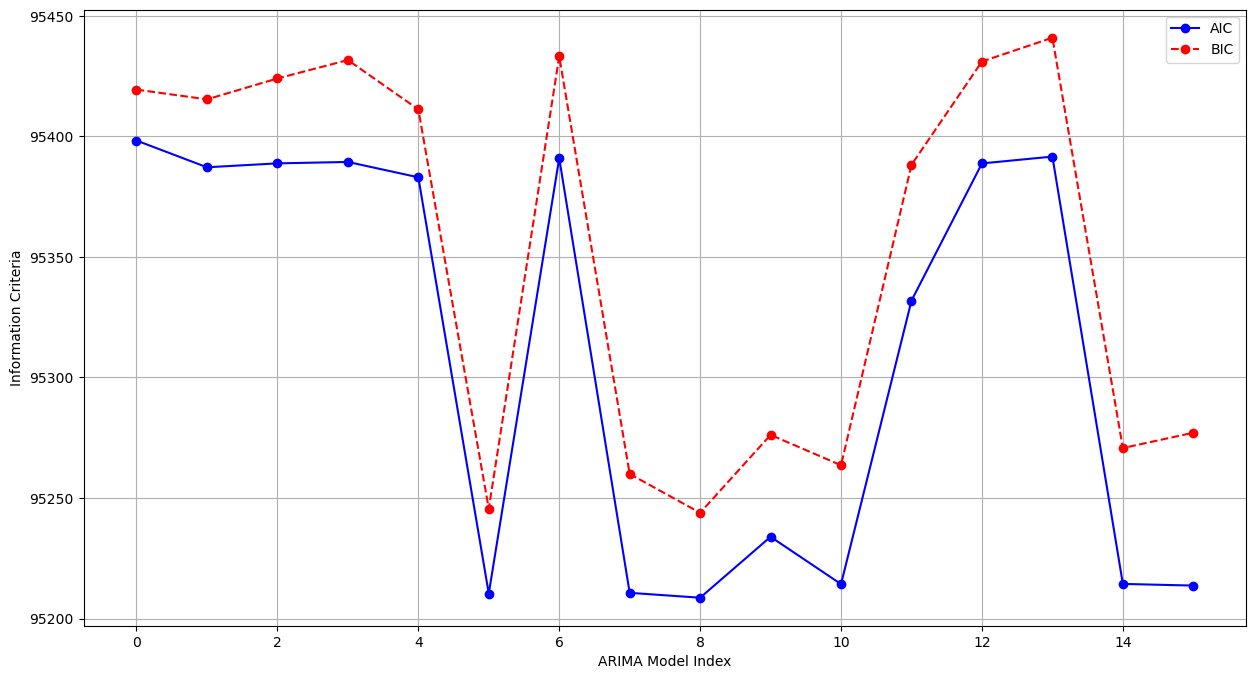

In [105]:
plt.figure(figsize=(15, 8))
plt.plot(results_df["AIC"], marker="o", linestyle="-", label="AIC", color="blue")
plt.plot(results_df["BIC"], marker="o", linestyle="--", label="BIC", color="red")

plt.xlabel("ARIMA Model Index")
plt.ylabel("Information Criteria")
plt.legend()
plt.grid(True)

In [106]:
optimal_p

3.0

In [107]:
# most optimal arima for MAE calculations
optimal_arima = ARIMA(wind_generation["Wind Generation"], order=(optimal_p, 1, optimal_q))
optimal_fitted_model = optimal_arima.fit()

mae_values = []
for n in window_size:
    forecast = optimal_fitted_model.forecast(steps=n)  # Forecast next n steps
    actual = wind_generation["Wind Generation"].iloc[-n:]  # Compare with actual future values
    mae = mean_absolute_error(actual[:len(forecast)], forecast)
    mae_values.append(mae)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be

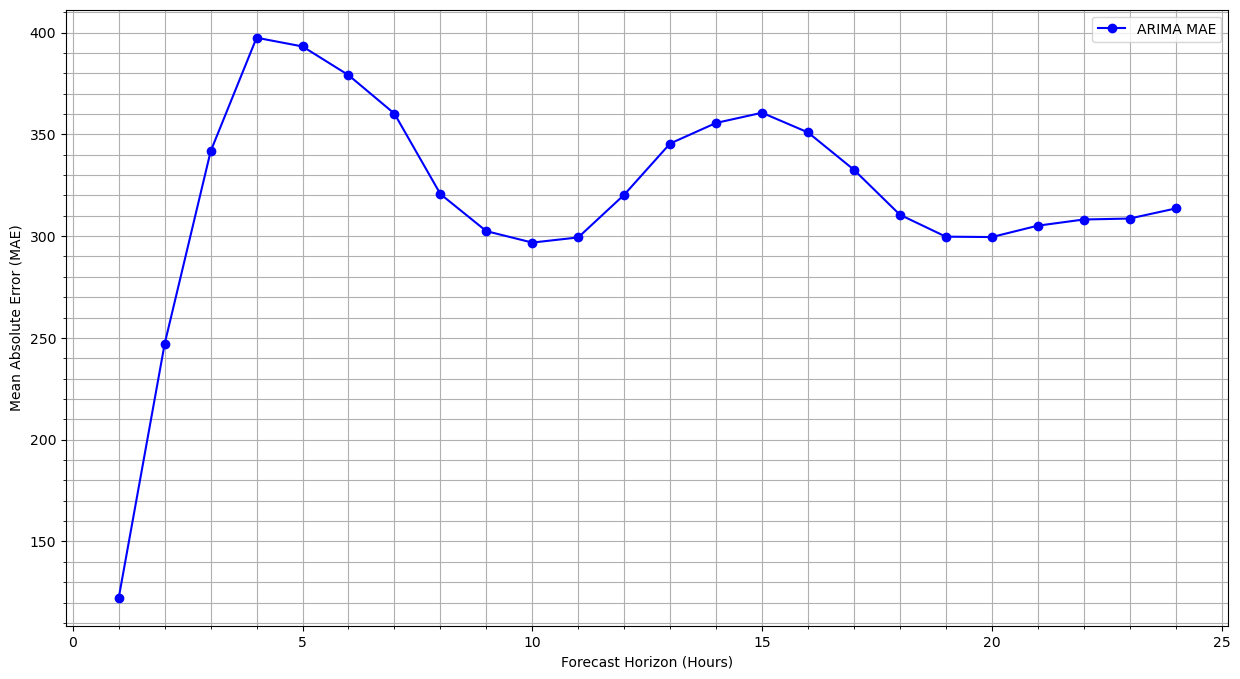

In [108]:
plt.figure(figsize=(15, 8))
plt.plot(window_size, mae_values, marker="o", linestyle="-", color="blue", label="ARIMA MAE")
plt.xlabel("Forecast Horizon (Hours)")
plt.ylabel("Mean Absolute Error (MAE)")
plt.legend()
plt.grid(which="both")
plt.minorticks_on()
plt.show()